In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset doing the basic checks.

In [2]:
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

## Shape of the data

In [3]:
print(df.shape)
print(test.shape)

(100000, 76)
(10000, 75)


## Head of the data

In [4]:
pd.set_option('display.max_column', None) #Setting pandas to display all columns.
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,1.0,1,51,120232.0,98.0,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0,0,0.0,98.0,1.0,1.0,SmallTablet,Windows.Desktop,561.0,330367.0,4.0,5.0,1850.0,15028.0,SSD,14348.0,0,1024.0,Notebook,8.0,800.0,1280.0,Slate,1.420000e+02,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0,26,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,513.0,21964.0,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,1.0,1,141,112854.0,167.0,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,AllInOne,Windows.Desktop,2668.0,25212.0,4.0,5.0,2407.0,953869.0,HDD,952592.0,1,4096.0,AllinOne,19.4,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,44548.0,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,1.0,1,51,41759.0,98.0,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,3035.0,263666.0,4.0,5.0,2719.0,228936.0,SSD,228321.0,1,8192.0,Desktop,24.0,1920.0,1080.0,Desktop,4.294967e+09,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,Retail,142.0,9414.0,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,1.0,1,68,19507.0,276.0,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,0.0,108.0,1.0,1.0,Notebook,Windows.Desktop,2102.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1890776.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.000000e+00,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,554.0,33060.0,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,1.0,1,43,117801.0,53.0,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.0,0,0.0,137.0,1.0,1.0,Desktop,Windows.Desktop,2668.0,257309.0,2.0,5.0,4322.0,305245.0,HDD,52804.0,0,2048.0,Desktop,20.0,1600.0,900.0,Desktop,4.294967e+09,10.0.17134.285,x86,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,37.0,158,FullAuto,0,IS_GENUINE,Retail,0.0,Retail,628.0

- Read the dataset. Saw training data has 100000 samples, 75 features and a target column.
- We also noticed that the features are categorical as well as numerical.

## Info of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [6]:
num_categorical = len(df.select_dtypes(include=['object']).columns)
num_numerical = len(df.select_dtypes(include=['int64', 'float64']).columns)
print(f"Number of categorical features:", num_categorical)
print(f"Number of numerical features:", num_numerical)

Number of categorical features: 28
Number of numerical features: 48


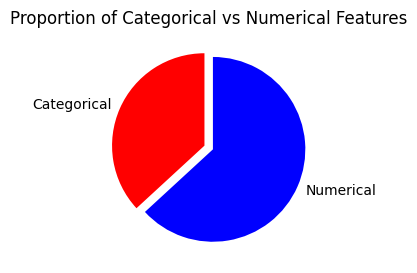

In [7]:
labels = ['Categorical', 'Numerical']
sizes = [num_categorical, num_numerical]
colors = ['r','b']

plt.figure(figsize=(3,3))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, explode=(0.05, 0.05))
plt.title("Proportion of Categorical vs Numerical Features")

plt.show()

## Statistical Description of the data

In [8]:
pd.set_option("display.float_format", "{:.4f}".format) # Setting display to float format upto 4 decimal places

In [9]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
IsBetaUser,100000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RealTimeProtectionState,99934.0000,6.8484,1.0152,0.0000,7.0000,7.0000,7.0000,8.0000
IsPassiveModeEnabled,100000.0000,0.0176,0.1316,0.0000,0.0000,0.0000,0.0000,1.0000
AntivirusConfigID,99924.0000,47975.7104,13803.3215,39.0000,49480.0000,53447.0000,53447.0000,70490.0000
NumAntivirusProductsInstalled,99924.0000,1.3265,0.5207,1.0000,1.0000,1.0000,2.0000,5.0000
NumAntivirusProductsEnabled,99924.0000,1.0183,0.1553,0.0000,1.0000,1.0000,1.0000,4.0000
HasTpm,100000.0000,0.9968,0.0567,0.0000,1.0000,1.0000,1.0000,1.0000
CountryID,100000.0000,108.0788,63.0622,1.0000,51.0000,97.0000,162.0000,222.0000
CityID,99377.0000,81029.9386,48944.0271,7.0000,36694.0000,82373.0000,122835.0000,167957.0000
GeoRegionID,100000.0000,169.7416,89.1889,1.0000,89.0000,181.0000,267.0000,296.0000


- Right now it is hard to understand anything from the summary.
- But is clearly visible that the numerical data are on different scales.

## Checking balance in data

In [10]:
df['target'].value_counts()

target
1    50525
0    49475
Name: count, dtype: int64

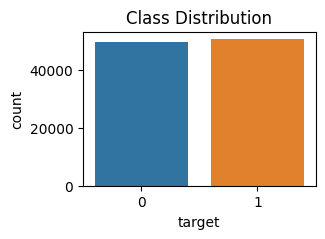

In [11]:
plt.figure(figsize=(3, 2))
sns.countplot(x='target', data=df)
plt.title('Class Distribution')
plt.show()

In [12]:
print(f"Count of duplicate rows:", df.duplicated().sum())

Count of duplicate rows: 165


In [13]:
print(f"Count of total null values in training data:", df.isnull().sum().sum())
print(f"Count of total null values in test data:", test.isnull().sum().sum())

Count of total null values in training data: 6533
Count of total null values in test data: 633


# Primary EDA Report

- This is a big data set corresponding to system and security configurations. - The Goal of the project is to build a robust algorithm to forecast system threats.
- It has the shape of 100000(rows = samples) and 76(columns = features), along with a target column.
- Datatype of the whole DataFrame can be classified into (float64: 31 features), (object: 28 features), (int64:features).
- The feature “MachineID” can safely be assumed to have a unique ID for each sample(row), hence checking of duplicate samples was performed for data cleaning purposes.
- Upon inspection 165 “MachineID” were found to be duplicate and which can safely be dropped from the training dataset. But as the number of duplicate are very low, so I choose not to drop the duplicates to keep the readability.
- In the dataset total 6533 null counts were found in training data and 633 in test data. Imputation needs to be performed on these.
- The features with Datatype: objects need thorough consideration for imputation.
- Values in the features like “PrimaryDiskCapacityMB” , “SystemVolumeCapacityMB” are huge float values. I believe Scaling will be helpful on these features.
- Features like “FirmwareVersionID”, “CityID”, “AntivirusConfigID”, “OEMNameID”, “OEMModelID”, etc do contain outliers or erroreous data but on a plain sight and visual inspection it looks like a categorical feature rather than a numeric feature. Will discuss this in the TA Session on how to cope up with these features.
- “InternalBatteryNumberOfCharges” is a feature with unusual standard deviation, infact larger than its mean, also needing some attention.
- There are some features that contain a large number of unique values and it would be a good idea to capture their uniqueness in a continuous manner that can be clubbed, imputed or encoded with ordinal values.

This is the primary report generated only by a plain inspection of the dataset. Moving further, detailed report will be generated.

# Data Cleaning

In [14]:
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0000,0,53447.0000,1.0000,1.0000,1,51,120232.0000,98.0000,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0000,0,0.0000,98.0000,1.0000,1.0000,SmallTablet,Windows.Desktop,561.0000,330367.0000,4.0000,5.0000,1850.0000,15028.0000,SSD,14348.0000,0,1024.0000,Notebook,8.0000,800.0000,1280.0000,Slate,142.0000,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0000,26,UNKNOWN,0,IS_GENUINE,Retail,0.0000,Retail,513.0000,21964.0000,0,0.0000,1,0,1.0000,0.0000,6.0000,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0000,0,53447.0000,1.0000,1.0000,1,141,112854.0000,167.0000,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0000,0,0.0000,137.0000,1.0000,1.0000,AllInOne,Windows.Desktop,2668.0000,25212.0000,4.0000,5.0000,2407.0000,953869.0000,HDD,952592.0000,1,4096.0000,AllinOne,19.4000,1600.0000,900.0000,Desktop,4294967295.0000,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0000,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0000,Retail,628.0000,44548.0000,1,0.0000,0,0,0.0000,0.0000,10.0000,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0000,0,53447.0000,1.0000,1.0000,1,51,41759.0000,98.0000,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0000,0,0.0000,137.0000,1.0000,1.0000,Desktop,Windows.Desktop,3035.0000,263666.0000,4.0000,5.0000,2719.0000,228936.0000,SSD,228321.0000,1,8192.0000,Desktop,24.0000,1920.0000,1080.0000,Desktop,4294967295.0000,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0000,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0000,Retail,142.0000,9414.0000,0,0.0000,0,0,0.0000,1.0000,6.0000,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0000,0,46413.0000,2.0000,1.0000,1,68,19507.0000,276.0000,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0000,0,0.0000,108.0000,1.0000,1.0000,Notebook,Windows.Desktop,2102.0000,242491.0000,4.0000,5.0000,3410.0000,1907729.0000,HDD,1890776.0000,0,8192.0000,Notebook,15.5000,1366.0000,768.0000,Mobile,0.0000,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0000,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0000,Retail,554.0000,33060.0000,1,0.0000,0,0,0.0000,0.0000,12.0000,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0000,0,40466.0000,2.0000,1.0000,1,43,117801.0000,53.00

### Since it can be clearly made out from the data that some of the features contain numerical information in 'EngineVersion', 'AppVersion', etc but they are object type. Hence. information from these features can be extracted by spliting these values by '.' using pandas str.split functionality. As a part of data cleaning process we will extract this information.

In [15]:
def split_object_columns(df):
    for col in df.select_dtypes(include='object').columns: 
        if df[col].str.contains(r'\.').any():  # Check if values contains '.'
            split_cols = df[col].str.split('.', expand=True)  # Split into multiple columns
            split_cols.columns = [f"{col}_{i+1}" for i in range(split_cols.shape[1])]  # Rename columns by adding num with original name
            df = pd.concat([df, split_cols], axis=1)  # Concatenate new columns
            df.drop(columns=[col], inplace=True)  # Drop the original column

    return df

df = split_object_columns(df)
test = split_object_columns(test)

print(f"Shape of the train after spliting few features:", df.shape)
print(f"Shape of the test after spliting few features:", test.shape)

Shape of the train after spliting few features: (100000, 97)
Shape of the test after spliting few features: (10000, 96)


## Target seperated

In [16]:
y = df['target']
df = df.drop(columns=['target'])

## Finding redundant features and dropping them

In [17]:
df.nunique()

MachineID                  99835
ProductName                    2
IsBetaUser                     1
RealTimeProtectionState        6
IsPassiveModeEnabled           2
                           ...  
DeviceFamily_2                 2
NumericOSVersion_1             1
NumericOSVersion_2             1
NumericOSVersion_3            23
NumericOSVersion_4           199
Length: 96, dtype: int64

### Checking unique counts in the features

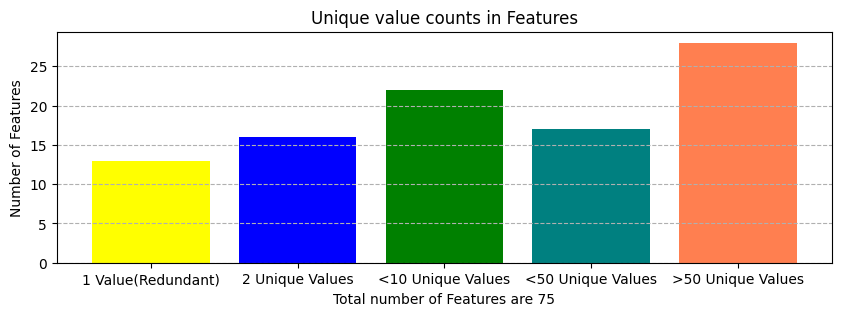

In [18]:
unique_counts = df.nunique()

categories = {
    "1 Value(Redundant)": sum(unique_counts == 1),
    "2 Unique Values": sum(unique_counts == 2),
    "<10 Unique Values": sum((unique_counts > 2) & (unique_counts < 10)),
    "<50 Unique Values": sum((unique_counts >= 10) & (unique_counts < 50)),
    ">50 Unique Values": sum(unique_counts >= 50),
}

plt.figure(figsize=(10, 3))
plt.bar(categories.keys(), categories.values(), color=["yellow", "blue", "green", "teal", "coral"])
plt.xlabel("Total number of Features are 75")
plt.ylabel("Number of Features")
plt.title("Unique value counts in Features")
plt.grid(axis="y", linestyle="--")

plt.show()

In [19]:
redundant_col = df.nunique() == 1  # Returns Boolean values
redundant_col = redundant_col[redundant_col].index.tolist() # forms a list
print(f"Redundant columns (one-value features):", redundant_col)

Redundant columns (one-value features): ['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'EngineVersion_1', 'EngineVersion_2', 'AppVersion_1', 'SignatureVersion_1', 'SignatureVersion_4', 'OSVersion_4', 'OsPlatformSubRelease_2', 'DeviceFamily_1', 'NumericOSVersion_1', 'NumericOSVersion_2']


In [20]:
df[['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled', 'EngineVersion_1', 'EngineVersion_2', 'AppVersion_1', 'SignatureVersion_1', 'SignatureVersion_4', 'OSVersion_4', 'OsPlatformSubRelease_2', 'DeviceFamily_1', 'NumericOSVersion_1', 'NumericOSVersion_2']].isnull().sum()

IsBetaUser                         0
AutoSampleSubmissionEnabled        0
IsFlightsDisabled                326
EngineVersion_1                    0
EngineVersion_2                    0
AppVersion_1                       0
SignatureVersion_1                 0
SignatureVersion_4                 0
OSVersion_4                        0
OsPlatformSubRelease_2         98599
DeviceFamily_1                     0
NumericOSVersion_1                 0
NumericOSVersion_2                 0
dtype: int64

In [21]:
df['IsFlightsDisabled'].value_counts()

IsFlightsDisabled
0.0000    99674
Name: count, dtype: int64

In [22]:
df['OsPlatformSubRelease_2'].value_counts()

OsPlatformSubRelease_2
1    1401
Name: count, dtype: int64

### To be noticed that the  feature 'IsFlightsDisabled' has only one unique count but at the same time has missing values. Even if we impute these missing values with the 1, it will not substantially affect the model building process or provide much variance. On a safer bet, I choose to drop this column considering it redundant.

### Also the feature 'OsPlatformSubRelease_2' has 98599 missing values, which cannot be determined using its present values which is just one unique value. It will be safe to consider this feature as redundant and drop it.

In [23]:
print(f"Before dropping shape of train:", df.shape)
print(f"Before dropping shape of test:",test.shape)
print(f"Number of redundant features:", len(redundant_col))

df = df.drop(columns=redundant_col)  
test = test.drop(columns=redundant_col)

print(f"After dropping redundant columns, train shape:",df.shape)
print(f"After dropping redundant columns, test shape:",test.shape)

Before dropping shape of train: (100000, 96)
Before dropping shape of test: (10000, 96)
Number of redundant features: 13
After dropping redundant columns, train shape: (100000, 83)
After dropping redundant columns, test shape: (10000, 83)


## Comparing missing values in train and test

In [24]:
missing_values = df.isnull().sum() 
missing_values_test = test.isnull().sum() 
dtype_col = df.dtypes 

missing_df = pd.DataFrame({
    'Missing Count Train': missing_values,
    'Missing Count Test': missing_values_test, 
    'DataType': dtype_col
})

missing_df = missing_df[(missing_df['Missing Count Train'] > 0) | (missing_df['Missing Count Test'] > 0)]

missing_df = missing_df.sort_values(by=['Missing Count Train', 'Missing Count Test'], ascending=False)

print(f"Total missing values now in training data:", missing_df['Missing Count Train'].sum())
print(f"Total missing values now in test data:", missing_df['Missing Count Test'].sum())
print("\n")
missing_df

Total missing values now in training data: 6207
Total missing values now in test data: 598




,Missing Count Train,Missing Count Test,DataType
SMode,981,92,float64
CityID,623,61,float64
IsGamer,559,62,float64
RegionIdentifier,559,62,float64
InternalBatteryNumberOfCharges,515,54,float64
FirmwareManufacturerID,376,32,float64
FirmwareVersionID,334,29,float64
OEMModelID,228,21,float64
OEMNameID,212,18,float64
FirewallEnabled,166,16,float64


Although features like CityID, GeoID, CountryID are categorical in nature but carry numerical dtypes. These type of features are called 'categorical in disguise'. But for the simplicity of the model and avoid explosion of feature counts, we will keep it as numerical and will not encode it like other categorical columns. 

### To be noted that test data has a missing value in GeoRegionID, where train data doesnot have missing value in that column.

# Data Preprocessing

In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

## Imputing the numerical columns with median and the categorical columns with the most frequent occuring value.

In [26]:
categoric_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.drop(columns=['target'], errors='ignore') \
                 .select_dtypes(include=['int64', 'float64']) \
                 .columns.tolist()
imputer = ColumnTransformer([
    ('num_imputer', SimpleImputer(strategy='median'), numeric_cols),
    ('cat_imputer', SimpleImputer(strategy='most_frequent'), categoric_cols)
])

print(f"Total null counts in train before:", df.isnull().sum().sum())
print(f"Total null counts in test before:", test.isnull().sum().sum())

df = pd.DataFrame(imputer.fit_transform(df), columns=numeric_cols + categoric_cols)
df[numeric_cols] = df[numeric_cols].astype(float)  # Convert numeric columns back to correct type

test = pd.DataFrame(imputer.transform(test), columns=numeric_cols + categoric_cols)
test[numeric_cols] = test[numeric_cols].astype(float)

print(f"Total null counts in train after imputation:", df.isnull().sum().sum())
print(f"Total null counts in test after imputation:", test.isnull().sum().sum())

print(f"Shape of train after imputation:", df.shape)
print(f"Shape of test after imputation:", test.shape)
print(f"Type of train after imputation:", type(df))
print(f"Type of test after imputation:", type(test))

Total null counts in train before: 6207
Total null counts in test before: 598
Total null counts in train after imputation: 0
Total null counts in test after imputation: 0
Shape of train after imputation: (100000, 83)
Shape of test after imputation: (10000, 83)
Type of train after imputation: <class 'pandas.core.frame.DataFrame'>
Type of test after imputation: <class 'pandas.core.frame.DataFrame'>


## Feature Engineering on some features.

### Changing DateAS and DateOS to a Pandas DataTime series. Calculating difference from and reference date to get a numeric count. Reference date is most recent date in each columns

In [27]:
def process_dates(df):
    df['DateAS'] = pd.to_datetime(df['DateAS'], errors='coerce')
    df['DateOS'] = pd.to_datetime(df['DateOS'], errors='coerce')
    reference_date = df[['DateAS', 'DateOS']].max().max() ## Choosing the latest date as reference
    df['DaysSinceInstall'] = (reference_date - df['DateAS']).dt.days
    df['DaysSinceOS'] = (reference_date - df['DateOS']).dt.days
    df = df.drop(columns=['DateAS', 'DateOS'])
    return df

df = process_dates(df)
test = process_dates(test)

print(f"Shape of train after date column conversion:", df.shape)
print(f"Shape of test after date column conversion:", test.shape)

df[['DaysSinceInstall', 'DaysSinceOS']].head(3)

Shape of train after date column conversion: (100000, 83)
Shape of test after date column conversion: (10000, 83)


,DaysSinceInstall,DaysSinceOS
0,21,168
1,46,49
2,11,21


### Some of the feature are better explained together and the information can be capture from them by doing some simple arithmatics. This will help in reducing collinearity and also feature count.

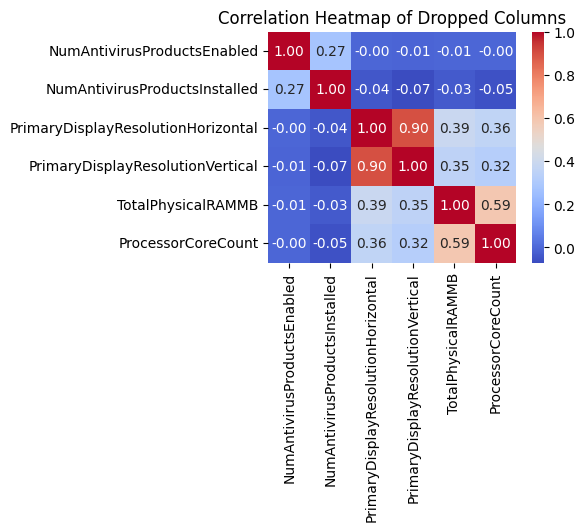

In [28]:
corr_cols = ['NumAntivirusProductsEnabled', 'NumAntivirusProductsInstalled',  
                'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical',
                'TotalPhysicalRAMMB', 'ProcessorCoreCount']

correlation_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Dropped Columns")
plt.show()

In [29]:
def add_custom_features(df):

    df['Antivirus_Enabled_Ratio'] = df['NumAntivirusProductsEnabled'] / df['NumAntivirusProductsInstalled']
    df['Display_Area'] = df['PrimaryDisplayResolutionHorizontal'] * df['PrimaryDisplayResolutionVertical']
    df['RAM_per_Core'] = df['TotalPhysicalRAMMB'] / df['ProcessorCoreCount']
        
    df.drop(columns=['NumAntivirusProductsEnabled', 'NumAntivirusProductsInstalled',  
            'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical',
            'TotalPhysicalRAMMB', 'ProcessorCoreCount'], errors='ignore', inplace=True)
    return df

df = add_custom_features(df)
test = add_custom_features(test)

print(f"Train Shape after add_custom_features:",df.shape)
print(f"Test Shape after add_custom_features:",test.shape)
df[['Antivirus_Enabled_Ratio', 'Display_Area','RAM_per_Core']].head(3)

Train Shape after add_custom_features: (100000, 80)
Test Shape after add_custom_features: (10000, 80)


,Antivirus_Enabled_Ratio,Display_Area,RAM_per_Core
0,1.0000,1024000.0000,256.0000
1,1.0000,1440000.0000,1024.0000
2,1.0000,2073600.0000,2048.0000


## Dropping 'MachineID' becuase it is unique identifier, hence we dont need it for generalisation.

In [30]:
df = df.drop(columns=['MachineID'])
test = test.drop(columns=['MachineID'])
print(f"After dropping MachineID, train shape:",df.shape)
print(f"After dropping MachineID, test shape:",test.shape)

After dropping MachineID, train shape: (100000, 79)
After dropping MachineID, test shape: (10000, 79)


## Identifying categorical feature to proceed for categorical encoding, we will check which columns are categorical and how many unique values it has.

In [31]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
print(f"\nNumber of Categorical features:", len(categorical_cols))

['ProductName', 'PlatformType', 'Processor', 'SKUEditionName', 'MDC2FormFactor', 'PrimaryDiskType', 'ChassisType', 'PowerPlatformRole', 'OSArchitecture', 'OSBranch', 'OSEdition', 'OSSkuFriendlyName', 'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel', 'FlightRing', 'EngineVersion_3', 'EngineVersion_4', 'AppVersion_2', 'AppVersion_3', 'AppVersion_4', 'SignatureVersion_2', 'SignatureVersion_3', 'OSVersion_1', 'OSVersion_2', 'OSVersion_3', 'OsPlatformSubRelease_1', 'OSBuildLab_1', 'OSBuildLab_2', 'OSBuildLab_3', 'OSBuildLab_4', 'OSBuildLab_5', 'DeviceFamily_2', 'NumericOSVersion_3', 'NumericOSVersion_4']

Number of Categorical features: 36


In [32]:
train_unique_counts = df[categorical_cols].nunique()
test_unique_counts = test[categorical_cols].nunique()

unique_counts_df = pd.DataFrame({
    'Train Unique Counts': train_unique_counts,
    'Test Unique Counts': test_unique_counts
})

print(unique_counts_df)

                          Train Unique Counts  Test Unique Counts
ProductName                                 2                   2
PlatformType                                4                   4
Processor                                   3                   3
SKUEditionName                              8                   7
MDC2FormFactor                             11                   9
PrimaryDiskType                             4                   4
ChassisType                                28                  21
PowerPlatformRole                           9                   8
OSArchitecture                              3                   3
OSBranch                                   13                  12
OSEdition                                  20                  15
OSSkuFriendlyName                          18                  14
OSInstallType                               9                   9
AutoUpdateOptionsName                       6                   6
OSGenuineS

## Binning the less occuring counts. It will help reduce dimensions. After OneHotEncoding, the column counts will explode if this is not done. It is basically limiting the unique count to 5 in high unique occurence only.

In [33]:
for col in categorical_cols:
    unique_counts = df[col].nunique()
    if unique_counts > 5:
      top_5 = df[col].value_counts().head(4).index  # Get top 5 most frequent values
      df[col] = df[col].where(df[col].isin(top_5), 'others')  # Replace values not in top 5 with 'others'
      test[col] = test[col].where(test[col].isin(top_5), 'others')

In [34]:
cat_cols_after = df.select_dtypes(include=['object']).columns

summary_df = pd.DataFrame({
    'Train Unique Count': df[cat_cols_after].nunique(),
    'Test Unique Count': test[cat_cols_after].nunique()
})

print(summary_df)

                          Train Unique Count  Test Unique Count
ProductName                                2                  2
PlatformType                               4                  4
Processor                                  3                  3
SKUEditionName                             5                  5
MDC2FormFactor                             5                  5
PrimaryDiskType                            4                  4
ChassisType                                5                  5
PowerPlatformRole                          5                  5
OSArchitecture                             3                  3
OSBranch                                   5                  5
OSEdition                                  5                  5
OSSkuFriendlyName                          5                  5
OSInstallType                              5                  5
AutoUpdateOptionsName                      5                  5
OSGenuineState                          

## OneHotEncoding on categorical

In [35]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

df_encoded = encoder.fit_transform(df[cat_cols_after])
df_encoded = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(cat_cols_after))

test_encoded = encoder.transform(test[cat_cols_after])
test_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(cat_cols_after))

df = df.drop(columns=cat_cols_after).reset_index(drop=True)
test = test.drop(columns=cat_cols_after).reset_index(drop=True)

df = pd.concat([df, df_encoded], axis=1)
test = pd.concat([test, test_encoded], axis=1)

print(f"Shape after One-Hot Encoding (Train):", df.shape)
print(f"Shape after One-Hot Encoding (Test):", test.shape)

Shape after One-Hot Encoding (Train): (100000, 203)
Shape after One-Hot Encoding (Test): (10000, 203)


## Standard Scaling on the data

In [36]:
ss = StandardScaler()

df_ss_scaled = ss.fit_transform(df)
df = pd.DataFrame(df_ss_scaled, columns=df.columns)

test_ss_scaled = ss.transform(test)
test = pd.DataFrame(test_ss_scaled, columns=test.columns)

print(f"Shape after One-Hot Encoding & StandardScaler (Train):", df.shape)
print(f"Shape after One-Hot Encoding & StandardScaler (Test):", test.shape)

df.head()

Shape after One-Hot Encoding & StandardScaler (Train): (100000, 203)
Shape after One-Hot Encoding & StandardScaler (Test): (10000, 203)


,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,PrimaryDisplayDiagonalInches,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DaysSinceInstall,DaysSinceOS,Antivirus_Enabled_Ratio,Display_Area,RAM_per_Core,ProductName_mse,ProductName_win8defender,PlatformType_windows10,PlatformType_windows2016,PlatformType_windows7,PlatformType_windows8,Processor_arm64,Processor_x64,Processor_x86,SKUEditionName_Education,SKUEditionName_Enterprise,SKUEditionName_Home,SKUEditionName_Pro,SKUEditionName_others,MDC2FormFactor_Convertible,MDC2FormFactor_Desktop,MDC2FormFactor_Detachable,MDC2FormFactor_Notebook,MDC2FormFactor_others,PrimaryDiskType_HDD,PrimaryDiskType_SSD,PrimaryDiskType_UNKNOWN,PrimaryDiskType_Unspecified,ChassisType_Desktop,ChassisType_Laptop,ChassisType_Notebook,ChassisType_Portable,ChassisType_others,PowerPlatformRole_Desktop,PowerPlatformRole_Mobile,PowerPlatformRole_Slate,PowerPlatformRole_Workstation,PowerPlatformRole_others,OSArchitecture_amd64,OSArchitecture_arm64,OSArchitecture_x86,OSBranch_others,OSBranch_rs2_release,OSBranch_rs3_release,OSBranch_rs3_release_svc_escrow,OSBranch_rs4_release,OSEdition_Core,OSEdition_CoreCountrySpecific,OSEdition_CoreSingleLanguage,OSEdition_Professional,OSEdition_others,OSSkuFriendlyName_CORE,OSSkuFriendlyName_CORE_COUNTRYSPECIFIC,OSSkuFriendlyName_CORE_SINGLELANGUAGE,OSSkuFriendlyName_PROFESSIONAL,OSSkuFriendlyName_others,OSInstallType_IBSClean,OSInstallType_UUPUpgrade,OSInstallType_Update,OSInstallType_Upgrade,OSInstallType_others,AutoUpdateOptionsName_AutoInstallAndRebootAtMaintenanceTime,AutoUpdateOptionsName_FullAuto,AutoUpdateOptionsName_Notify,AutoUpdateOptionsName_UNKNOWN,AutoUpdateOptionsName_others,OSGenuineState_INVALID_LICENSE,OSGenuineState_IS_GENUINE,OSGenuineState_OFFLINE,OSGenuineState_UNKNOWN,LicenseActivationChannel_OEM:DM,LicenseActivationChannel_OEM:NONSLP,LicenseActivationChannel_Retail,LicenseActivationChannel_Volume:GVLK,LicenseActivationChannel_others,FlightRing_NOT_SET,FlightRing_RP,FlightRing_Retail,FlightRing_Unknown,FlightRing_others,EngineVersion_3_14901,EngineVersion_3_15000,EngineVersion_3_15100,EngineVersion_3_15200,EngineVersion_3_others,EngineVersion_4_1,EngineVersion_4_2,EngineVersion_4_3,EngineVersion_4_4,EngineVersion_4_others,AppVersion_2_12,AppVersion_2_13,AppVersion_2_18,AppVersion_2_9,AppVersion_2_others,AppVersion_3_10586,AppVersion_3_17134,AppVersion_3_1806,AppVersion_3_1807,AppVersion_3_others,AppVersion_4_0,AppVersion_4_15,AppVersion_4_18062,AppVersion_4_18075,AppVersion_4_others,SignatureVersion_2_269,SignatureVersion_2_271,SignatureVersion_2_273,SignatureVersion_2_275,SignatureVersion_2_others,SignatureVersion_3_1140,SignatureVersion_3_1244,SignatureVersion_3_1420,SignatureVersion_3_371,SignatureVersion_3_others,OSVersion_1_10,OSVersion_1_6,OSVersion_2_0,OSVersion_2_1,OSVersion_2_3,OSVersion_3_0,OSVersion_3_1,OSVersion_3_2,OSVersion_3_3,OSVersion_3_4,OsPlatformSubRelease_1_others,OsPlatformSubRelease_1_rs1,OsPlatformSubRelease_1_rs2,OsPlatformSubRelease_1_rs3,OsPlatformSubRelease_1_rs4,OSBuildLab_1_14393,OSBuildLab_1_15063,OSBuildLab_1_16299,OSBuildLab_1_17134,OSBuildLab_1_others,OSBuildLab_2_0,OSBuildLab_2_1,OSBuildLab_2_15,OSBuildLab_2_431,OSBuildLab_2_others,OSBuildLab_3_amd64fre,OSBuildLab_3_arm64fre,OSBuildLab_3_x86fre,OSBuildLab_4_others,OSBuildLab_4_rs2_release,OSBuildLab_4_rs3_release,OSBuildLab_4_rs3_release_svc_escrow,OSBuildLab_4_rs4_release,OSBuildLab_5_170317-1834,OSBuildLab_5_170928-1534,OSBuildLab_5_180410-1804,OSBuildLab_

### Creating a copy of data for reuse if anything goes sideways

In [37]:
df_random = df.copy()
test_random = test.copy()

# Feature Selection using Lasso before model building

In [38]:
# This split will be used for feature selection and decompostition analysis.
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.3, stratify=y, random_state=42)
print(X_train.shape)
print(X_val.shape)

(70000, 203)
(30000, 203)


In [39]:
# This split set will be used in XGBoost Classifier and RandomForest Classifier training and validation.
X_train_full, X_val_full, y_train_full, y_val_full = train_test_split(df_random, y, test_size = 0.3, stratify=y, random_state=42)
print(X_train_full.shape)
print(X_val_full.shape)

(70000, 203)
(30000, 203)


### We were having 155 features after the prepocessing. Out of those 155 features it is prudent to assume that not all the features add value or importance to an actual model building and training. Hence, I choose an aggressive feature selection by opting Lasso as a feature selection method. What Lasso will do is to remove the redundant, correlated and unimportant features. Lasso shrinks the coefficients of these unimportant features to 0 by using regularization on the weights of the feature i.e the alpha value. We will test with various alpha values to see what is the optimal number of features which are contributing to the accuracy score iteratively.

In [40]:
from sklearn.linear_model import Lasso
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

alpha_values = [0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001]

feature_count = []
accuracy = []

for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=5000, tol=0.01) # choose alpha iteratively
    lasso.fit(X_train, y_train)
    selected_features = X_train.columns[lasso.coef_ != 0] # check coef with each alpha value and selected non zero features
    feature_count.append(len(selected_features)) # append feature count
    if len(selected_features) > 0:
        estimator = XGBClassifier(eval_metric="logloss", random_state=42, n_jobs=-1)
        estimator.fit(X_train[selected_features], y_train) # train estimator with selected features for accuracy evaluation
        y_pred = estimator.predict(X_val[selected_features])
        acc = accuracy_score(y_val, y_pred) # append accuracy score
    else:
        acc = 0 # when no features retain with alpha value
    accuracy.append(acc)
    print(f"Alpha: {alpha}, Features retained: {len(selected_features)}, Accuracy: {acc:.4f}") # print in each iteration      

Alpha: 0.1, Features retained: 0, Accuracy: 0.0000
Alpha: 0.05, Features retained: 2, Accuracy: 0.5821
Alpha: 0.02, Features retained: 17, Accuracy: 0.6076
Alpha: 0.01, Features retained: 28, Accuracy: 0.6125
Alpha: 0.005, Features retained: 44, Accuracy: 0.6153
Alpha: 0.002, Features retained: 99, Accuracy: 0.6143
Alpha: 0.001, Features retained: 111, Accuracy: 0.6149
Alpha: 0.0005, Features retained: 126, Accuracy: 0.6129
Alpha: 0.0002, Features retained: 133, Accuracy: 0.6143
Alpha: 0.0001, Features retained: 148, Accuracy: 0.6176


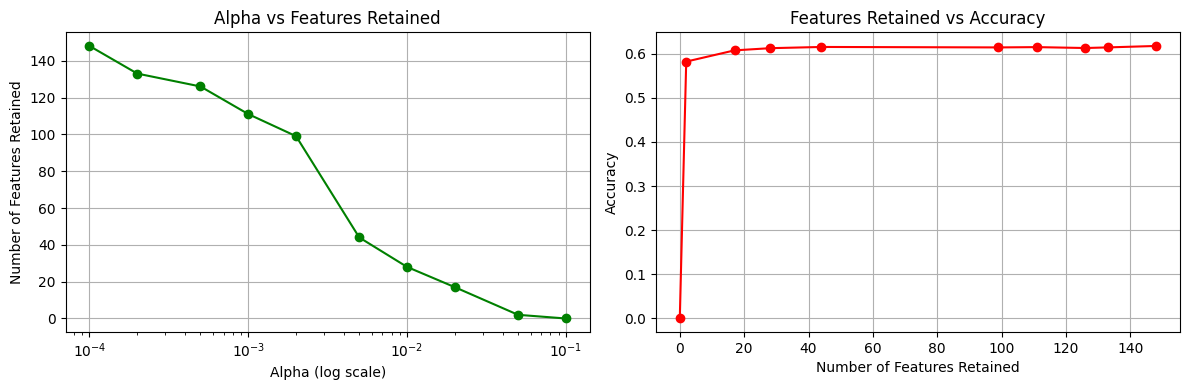

In [41]:
plot_df = pd.DataFrame({"Features Retained": feature_count, "Accuracy": accuracy, "Alpha": alpha_values})

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Alpha vs Features Retained
axes[0].plot(plot_df["Alpha"], plot_df["Features Retained"], marker="o", linestyle="-", color="green")
axes[0].set_xscale("log")  # Log scale for better visualization
axes[0].set_xlabel("Alpha (log scale)")
axes[0].set_ylabel("Number of Features Retained")
axes[0].set_title("Alpha vs Features Retained")
axes[0].grid(True)

# Features Retained vs Accuracy
axes[1].plot(plot_df["Features Retained"], plot_df["Accuracy"], marker="o", linestyle="-", color="red")
axes[1].set_xlabel("Number of Features Retained")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Features Retained vs Accuracy")
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Since we have performed an iterative feature selection analysis on the processed dataset and saw visually that alpha value 0.005 is the optimal choice of alpha because it doesnot drop too many features and also maintains a good accuracy score. Choosing higher value of alpha will reduce the feature count further but our main objective is not to loose variance and important information by reducing feature count. On the other hand opting for lower value of alpha will retain more features but it can be seen from the figure and print results that increasing feature counts will not significantly increase the accuracy. We want to avoid noise as much as possible for efficient model building. 

In [42]:
print(f"Originally train before Lasso Selection:", X_train.shape)
print(f"Originally test before Lasso Selection:", test.shape)

lasso = Lasso(alpha=0.005, max_iter=5000, tol=0.01)
lasso.fit(X_train, y_train)
selected_features = X_train.columns[lasso.coef_ != 0]
X_train = X_train[selected_features]
X_val = X_val[selected_features]
test = test[selected_features]

print(f"Train after Lasso feature Selection:", X_train.shape)
print(f"Test after Lasso feature Selection:", test.shape)

Originally train before Lasso Selection: (70000, 203)
Originally test before Lasso Selection: (10000, 203)
Train after Lasso feature Selection: (70000, 44)
Test after Lasso feature Selection: (10000, 44)


## Checking linear seperability. It will help us in determining models to be selected for training.

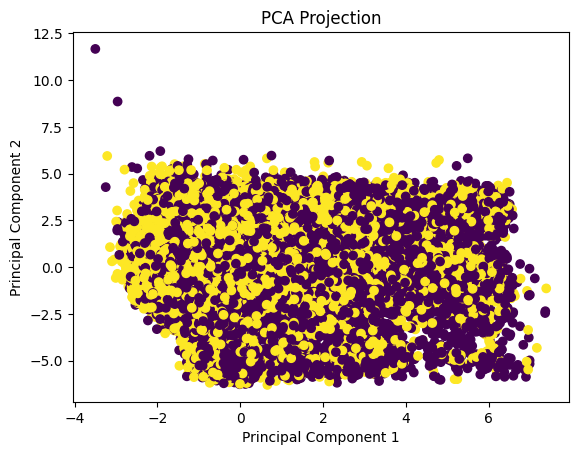

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.show()

### It can be interpreted from the PCA projection that the data set is not linealy seperable. Meaning there cannot be drawn a decision boundary which can seperated the data and acheive our classification goal. Although I have opted for a crude approach to express this point of linear seperabilty, yet this is an effective technique to arrive at a decision. I have trained numerous models without even realising that data may not be linearly seperated but after week of pondering and researching I finally found out the data itself is not linearly seperable hence, training using linear models will not yield good results. I tried polynomial features transformation but it was computationally heavy on Kaggle.

# Goal of this Project:
### "The goal of this competition is to predict a system’s probability of getting infected by various families of malware, based on different properties of that system. The telemetry data containing these properties and the system infections was generated by threat reports collected by system's antivirus software."

In this malware prediction competition, according to my opinion **recall is more important than precision**. Here’s why:
- Why Recall?: 
    Risk of False Negatives (FN): If an infected system is misclassified as safe, malware can spread, causing security risks.
    It’s better to flag a safe system as potentially infected (false positive) than to let an infected system go unnoticed.

- Why Not Precision?
    Precision focuses on reducing false positives (FP) (safe systems incorrectly flagged as infected).
    While unnecessary alerts might be annoying, they don't pose a major risk compared to missing real infections.

- Best Metrics to focus on:
    Recall (Sensitivity): Measures how many actual infections are correctly detected.
    F1-Score: Balances recall and precision. Serves as an anchor to the overall model accuracy.

- Although there is no hard and fast rule as to what should be the best metrics to lookout for in this present case. But subject to the reasonings provided above my focus in the following model building will be maintain high recall with balanced precision thereby contributing proportionally to the F1-Score and the overall accuracy.

# Model 1 XGBoost Classifier

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold, RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

## It was noticed during the model building that the dataset with lasso selected feature was giving a lower accuracy as compared to the whole dataset with all the features. Hence, RandomForest and XGBoostClassifier were trained on the whole dataset. Feature selection will not go in vain as I have decided to train the third model as SGDClassifier, where I can use polynomial expression on the reduced dataset and then train the SGDClassifier.

### We will begin with tring random models keeping our parameters close to the randomsearch grid.

In [45]:
# param_grid = {
#     'n_estimators': [500, 550, 600],
#     'learning_rate': np.arange(0.03, 0.05, 0.005),
#     'reg_lambda': np.arange(1, 2, 0.25),
#     'reg_alpha': np.arange(0.5, 1, 0.125),
#     'scale_pos_weight': [0.9, 0.925, 0.95, 0.975],
# }

# xgb_clf = xgb.XGBClassifier(subsample=0.8, max_depth=6, gamma=0.3, colsample_bytree=0.8, min_child_weight=5,
#                           objective='binary:logistic', eval_metric='logloss', random_state=42)

# random_search = RandomizedSearchCV(
#     estimator=xgb_clf,
#     param_distributions=param_grid,
#     n_iter=30, 
#     scoring='f1', 
#     n_jobs=3,
#     cv=5, 
#     verbose=3,
#     random_state=42
# )

# random_search.fit(X_train_full, y_train_full)

# print("Best parameters found:", random_search.best_params_)

# tuned_xgb = random_search.best_estimator_
# tuned_xgb.fit(X_train_full, y_train_full)
# y_pred_tuned = tuned_xgb.predict(X_val_full)

# print("Accuracy:", accuracy_score(y_val_full, y_pred_tuned))
# print("\nClassification report of tuned model:")
# print(classification_report(y_val_full, y_pred_tuned))
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_val_full, y_pred_tuned))

### Having tried grid search cv to find the best parameters was failure. None of the grid search run were completed due to memory leak. So I choose to train 5 seperate model by hypertuning it manually and decided to combine them later.

In [46]:
xgb_1 = xgb.XGBClassifier(
    scale_pos_weight=0.975,
    reg_lambda=1.25,
    reg_alpha=0.75,
    n_estimators=500,
    learning_rate=0.03,
    subsample=0.85,
    max_depth=6,
    gamma=0.2,
    colsample_bytree=0.8,
    min_child_weight=5,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_2 = xgb.XGBClassifier(
    scale_pos_weight=0.95,
    reg_lambda=1.30,
    reg_alpha=0.8,
    n_estimators=700,
    learning_rate=0.03,
    subsample=0.8,
    max_depth=6,
    gamma=0.2,
    colsample_bytree=0.8,
    min_child_weight=7,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Validation Set Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print("Validation Set Confusion Matrix:")
    print(confusion_matrix(y_val, y_val_pred))

print("Evaluating xgb_1:")
evaluate_model(xgb_1, X_train_full, y_train_full, X_val_full, y_val_full)

print("Evaluating xgb_2:")
evaluate_model(xgb_2, X_train_full, y_train_full, X_val_full, y_val_full)

Evaluating xgb_1:
Accuracy: 0.6264
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.61     14843
           1       0.62      0.65      0.64     15157

    accuracy                           0.63     30000
   macro avg       0.63      0.63      0.63     30000
weighted avg       0.63      0.63      0.63     30000

Validation Set Confusion Matrix:
[[8888 5955]
 [5253 9904]]
Evaluating xgb_2:
Accuracy: 0.6260
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62     14843
           1       0.63      0.63      0.63     15157

    accuracy                           0.63     30000
   macro avg       0.63      0.63      0.63     30000
weighted avg       0.63      0.63      0.63     30000

Validation Set Confusion Matrix:
[[9164 5679]
 [5542 9615]]


In [47]:
# Score 0.63100 in cv
xgb_3 = xgb.XGBClassifier(
    scale_pos_weight=0.95,
    reg_lambda=1.25,
    reg_alpha=0.75,
    n_estimators=550,
    max_depth=6,
    learning_rate=0.04,
    subsample=0.8,
    gamma=0.3,
    colsample_bytree=0.8,
    min_child_weight=5,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
# Score 0.63100 in submission
xgb_4 = xgb.XGBClassifier(
    subsample=0.8,
    scale_pos_weight=0.95,
    reg_lambda=2,
    reg_alpha=1,
    n_estimators=550,
    max_depth=6,
    learning_rate=0.04,
    gamma=0.3,
    colsample_bytree=0.8,
    min_child_weight=5,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

print("Evaluating xgb_3:")
evaluate_model(xgb_3, X_train_full, y_train_full, X_val_full, y_val_full)

print("Evaluating xgb_4:")
evaluate_model(xgb_4, X_train_full, y_train_full, X_val_full, y_val_full)

Evaluating xgb_3:
Accuracy: 0.6264
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62     14843
           1       0.63      0.64      0.63     15157

    accuracy                           0.63     30000
   macro avg       0.63      0.63      0.63     30000
weighted avg       0.63      0.63      0.63     30000

Validation Set Confusion Matrix:
[[9168 5675]
 [5532 9625]]
Evaluating xgb_4:
Accuracy: 0.6262
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62     14843
           1       0.63      0.63      0.63     15157

    accuracy                           0.63     30000
   macro avg       0.63      0.63      0.63     30000
weighted avg       0.63      0.63      0.63     30000

Validation Set Confusion Matrix:
[[9173 5670]
 [5543 9614]]


In [48]:
# Score 0.63050 in submission
# Score 0.63130 in cv
# xgb_33 is possible case of overfitting
xgb_33 = xgb.XGBClassifier(
    scale_pos_weight=0.94,
    reg_lambda=1.25,
    reg_alpha=0.75,
    n_estimators=900, # High number of estimators prone to overfitting
    max_depth=9, # Another possible reason of overfitting
    learning_rate=0.01,
    subsample=0.9,
    gamma=0.3,
    colsample_bytree=0.85,
    min_child_weight=2,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb_best = xgb.XGBClassifier(
    subsample=0.95,
    scale_pos_weight=0.975,
    reg_lambda=1.2,
    reg_alpha=0.9,
    random_state=42,
    objective='binary:logistic',
    n_estimators=600,
    min_child_weight=6,
    max_depth=6,
    learning_rate=0.015,
    gamma=0.1,
    eval_metric='logloss',
    colsample_bytree=0.9
)

print("Evaluating xgb_33:")
evaluate_model(xgb_33, X_train_full, y_train_full, X_val_full, y_val_full)

print("Evaluating xgb_best:")
evaluate_model(xgb_best, X_train_full, y_train_full, X_val_full, y_val_full)

Evaluating xgb_33:
Accuracy: 0.6261
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62     14843
           1       0.63      0.63      0.63     15157

    accuracy                           0.63     30000
   macro avg       0.63      0.63      0.63     30000
weighted avg       0.63      0.63      0.63     30000

Validation Set Confusion Matrix:
[[9211 5632]
 [5586 9571]]
Evaluating xgb_best:
Accuracy: 0.6245
Validation Set Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61     14843
           1       0.62      0.66      0.64     15157

    accuracy                           0.62     30000
   macro avg       0.62      0.62      0.62     30000
weighted avg       0.62      0.62      0.62     30000

Validation Set Confusion Matrix:
[[ 8687  6156]
 [ 5108 10049]]


### Since I have already trained four XGBoost Classifier model, I have decide to ensemble all these model capacity in one Voting Classifier. Purposely, I have tuned all the five models slightly biased. xgb_1 is slighly tuned towards higher precision and recall for class 1. xgb_2 is tuned for higher recall for 0. xgb_3 and xgb_4 are balanced for equal performance. Using the voting classifier with these estimators will give us desirable and consistent result hopefully.

### Out of couriosity, I added two more model irresistibly. I added one overfitted model xgb_33 for better recall on 1 as this is a System Threat Forecaster hence, in practical situations missing on True Positive can be a costly mistake. Also a random model xgb_best from my previous search to infuse some randomness in the submission score because my models were too stable predictor. It was worth taking a chance in the last submission of the season.

In [49]:
# Hard Accuracy: 0.6263
# Soft Accuracy: 0.6254

voting_clf = VotingClassifier(
    estimators=[
        ("xgb_1", xgb_1),
        ("xgb_2", xgb_2),
        ("xgb_3", xgb_3),
        ("xgb_4", xgb_4),
        ("xgb_33", xgb_33),
        ("xgb_best", xgb_best)
    ],
    voting='hard'  # 'soft' uses predicted probabilities, 'hard' uses absolute vote count.
)

voting_clf.fit(X_train_full, y_train_full)

y_val_pred = voting_clf.predict(X_val_full)

print("Accuracy:", accuracy_score(y_val_full, y_val_pred))
print("Voting Classifier Evaluation:")
print(classification_report(y_val_full, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val_full, y_val_pred))

Accuracy: 0.6263666666666666
Voting Classifier Evaluation:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62     14843
           1       0.63      0.63      0.63     15157

    accuracy                           0.63     30000
   macro avg       0.63      0.63      0.63     30000
weighted avg       0.63      0.63      0.63     30000

Confusion Matrix:
[[9223 5620]
 [5589 9568]]


In [50]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "xgb_1": xgb_1,# bias to 0
    "xgb_2": xgb_2,# balanced
    "xgb_3": xgb_3,# balanced
    "xgb_4": xgb_4, # bias to 1
    "xgb_33": xgb_33,
    "xgb_best": xgb_best,
    "voting_clf":voting_clf
}

for name, model in models.items():
    y_pred = cross_val_predict(model, X_train_full, y_train_full, cv=skf)
    accuracy = accuracy_score(y_train_full, y_pred)
    report = classification_report(y_train_full, y_pred)
    cm = confusion_matrix(y_train_full, y_pred)

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    print("\nConfusion Matrix:")
    print(cm)


Model: xgb_1
Accuracy: 0.6289

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.60      0.62     34632
           1       0.63      0.66      0.64     35368

    accuracy                           0.63     70000
   macro avg       0.63      0.63      0.63     70000
weighted avg       0.63      0.63      0.63     70000


Confusion Matrix:
[[20776 13856]
 [12121 23247]]

Model: xgb_2
Accuracy: 0.6282

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.62     34632
           1       0.63      0.64      0.63     35368

    accuracy                           0.63     70000
   macro avg       0.63      0.63      0.63     70000
weighted avg       0.63      0.63      0.63     70000


Confusion Matrix:
[[21470 13162]
 [12861 22507]]

Model: xgb_3
Accuracy: 0.6277

Classification Report:
              precision    recall  f1-score   support

           0       0.62   

In [51]:
xgb_1.fit(df_random, y)
y_predict = xgb_1.predict(test_random)

submission = pd.DataFrame({'id': range (0, test.shape[0]), 'target': y_predict})
submission.to_csv('submission.csv', index=False)
print('Submission file saved after XGBClassifier')

Submission file saved after XGBClassifier


# Model 2 RandomForest Classifier

## Random Model Search to guess optimal parameters

In [52]:
# model_1 = RandomForestClassifier(
#     n_estimators=900,
#     max_depth=18,
#     max_features='log2',
#     min_samples_split=5,
#     min_samples_leaf=4,
#     class_weight={0: 1.3, 1: 1.2},
#     criterion='entropy',
#     bootstrap=False,
#     n_jobs=-1,
#     random_state=42
# )


# model_2 = RandomForestClassifier(
#     n_estimators=600,
#     max_depth=20,
#     max_features=0.4,
#     min_samples_split=5,
#     min_samples_leaf=2,
#     class_weight={0: 1.1, 1: 1.0},
#     criterion='gini',
#     bootstrap=True,
#     n_jobs=-1,
#     random_state=42
# )

# model_3 = RandomForestClassifier(
#     n_estimators=300,
#     max_depth=15,
#     max_features='log2',
#     min_samples_split=6,
#     min_samples_leaf=1,
#     class_weight='balanced',
#     criterion='entropy',
#     bootstrap=True,
#     n_jobs=-1,
#     random_state=42
# )

# def evaluate_model(model, X_train, y_train, X_val, y_val):
#     model.fit(X_train, y_train)
#     y_val_pred = model.predict(X_val)

#     print("Validation Set Classification Report:")
#     print(classification_report(y_val, y_val_pred))
#     cm = confusion_matrix(y_val, y_val_pred)
#     print("Validation Set Confusion Matrix:")
#     print(cm)

# print("Evaluating Model 1:")
# evaluate_model(model_1, X_train_full, y_train_full, X_val_full, y_val_full)

# print("Evaluating Model 2:")
# evaluate_model(model_2, X_train_full, y_train_full, X_val_full, y_val_full)

# print("Evaluating Model 3:")
# evaluate_model(model_3, X_train_full, y_train_full, X_val_full, y_val_full)

## Best parameter model's predictions on whole data

In [53]:
# # Score 0.62470
# model_1 = RandomForestClassifier(
#     n_estimators=600,
#     max_depth=20,
#     max_features=0.4,
#     min_samples_split=5,
#     min_samples_leaf=2,
#     class_weight={0: 1.1, 1: 1.0},
#     criterion='gini',
#     bootstrap=True,
#     n_jobs=-1,
#     random_state=42
# )

# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# y_pred = cross_val_predict(model_1, df_random, y, cv=skf)

# report = classification_report(y, y_pred)
# print("Classification Report:")
# print(report)

# cm = confusion_matrix(y, y_pred)
# print("Confusion Matrix:")
# print(cm)

In [54]:
# model_2.fit(df_random, y)
# y_predict = model_2.predict(test_random)

# submission = pd.DataFrame({'id': range (0, test_random.shape[0]), 'target': y_predict})
# submission.to_csv('submission.csv', index=False)
# print('Submission file saved after RandomForestClassifier')

# Secondary EDA Report

- We have acheived a good accuracy by using the Random Forest Classifier and XGBoost Classifier on the whole preprocessed data without feature selection.
- These algorithm are robust enough to handle non-linear data.
- But as a part of the project the third and final model I have decided is to train the all famous SGD Classifer. This algorithm is just irresistable to be tried. It give a lot more control and opportunity for tuning the model.
- Although, the accuracy acheived with SGD Classifer was not enough when we tried it on the whole training dataset.
- To counter non-linear issue, we have tried Polynomial Feature conversion of degree 2(degree 3 was too heavy on computation, restarted my kernel) on the features selected by Lasso.
- In between we have tried other models as well like RidgeClassifer and GaussianNaiveBayes. But they did not match the expectation.
- Upon refining the data, and applying a SGDClassifier we were able to acheive a presentable score with the tuned model.
- In the whole notebook, we have tried GridSearchCV several time to find best parameters, but failing to complete any of the run, we opted for RandomSearchCV.
- RandomSearchCV also did a commendable job in tuning the parameter of many models in this notebook.
- During RandomForestClassifier hypertuning, we were not able to complete any of the parameter search run because of memory leak to we randomly opted for some models and then tuned those models which works well.
- **In the whole project, our focus was not to acheive only high accuracy from the model but also as stable and balanced performance.**

In [55]:
from sklearn.linear_model import Lasso, LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

## Testing GausianNaiveBayes using grid search

In [56]:
param_grid = {
    "var_smoothing": [2e-9, 3e-9, 4e-9], 
    "priors": [[0.72, 0.28], [0.75, 0.25], [0.78, 0.22]]
}


nb_clf = GaussianNB()

grid_search = GridSearchCV(
    nb_clf, param_grid, scoring="f1_weighted", cv=3, n_jobs=-1, verbose=2
)

grid_search.fit(X_train, y_train)
best_nb = grid_search.best_estimator_
y_pred_nb = best_nb.predict(X_val)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

best_model_gnb = grid_search.best_estimator_
best_model_gnb.fit(X_train, y_train)
y_pred_gnb = best_model_gnb.predict(X_val)

print("\nClassification Report:\n", classification_report(y_val, y_pred_nb))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'priors': [0.78, 0.22], 'var_smoothing': 2e-09}
Best F1 Score: 0.5520841761724888

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.33      0.44     14843
           1       0.55      0.81      0.66     15157

    accuracy                           0.58     30000
   macro avg       0.60      0.57      0.55     30000
weighted avg       0.60      0.58      0.55     30000



# Model 3 SGD Classifier with log_loss

## Hyperparameter tuning of SGD Classifier + Polynomial Feature

In [57]:
# sgd_clf = SGDClassifier(
#     loss="log_loss",
#     l1_ratio=0.3,
#     penalty="elasticnet",
#     alpha=0.001,
#     tol=1e-5,
#     max_iter=2000,
#     early_stopping=True,
#     validation_fraction=0.1,
#     n_iter_no_change=15,
#     warm_start=True,
#     n_jobs=-1,
#     random_state=42
# )

# param_dist = {'sgd__class_weight': [{0: 1, 1: 1.1}, {0: 1.2, 1: 1.1},{0: 1.3, 1: 1.2}]}

# pipeline = Pipeline([
#     ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),  # Polynomial features
#     ('sgd', sgd_clf) 
# ])

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# random_search = RandomizedSearchCV(
#     pipeline, param_distributions=param_dist, 
#     n_iter=3, cv=cv, scoring='f1_weighted', 
#     n_jobs=-1, random_state=42, verbose=2
# )

# random_search.fit(X_train, y_train)

# best_model_sgd = random_search.best_estimator_
# print("Best Model Parameters:\n",{random_search.best_params_)

# cv_scores = cross_val_score(best_model_sgd, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

# print("\nCross-Validation Accuracy Scores:", cv_scores)
# print("Mean Accuracy:", np.mean(cv_scores):.4f)
# print("Standard Deviation:", np.std(cv_scores):.4f)

# y_pred_sgd = best_model_sgd.predict(X_val)

# print("\nClassification Report:")
# print(classification_report(y_val, y_pred_sgd))

## Prediction using SGD Classifier

In [58]:
# y_predict = best_model_sgd.predict(test)

# submission = pd.DataFrame({'id': range (0, test.shape[0]), 'target': y_predict})
# submission.to_csv('submission.csv', index=False)
# print('Submission file saved after Polynomial + SGDClassifier(log_loss)')

# Milestone 1

## Data Loading

In [59]:
import pandas as pd
import numpy as np

In [60]:
train_data = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')

In [61]:
train_data.shape

(100000, 76)

In [62]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

## Portal Milestone 1 G-Form Answers

### Drop the null values dropna() in the training dataset and answer the following questions on that dataset.

In [63]:
pd.set_option('display.max_rows', None)
null_values = train_data.isna().sum()
print(null_values[null_values > 0])

RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
InternalBatteryNumberOfCharges    

In [64]:
# null_values.sum()

In [65]:
train_data_nadropped = train_data.dropna()

In [66]:
pd.set_option('display.max_columns', None)
train_data_nadropped.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0000,0,53447.0000,1.0000,1.0000,1,51,120232.0000,98.0000,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.0000,0,0.0000,98.0000,1.0000,1.0000,SmallTablet,Windows.Desktop,561.0000,330367.0000,4.0000,5.0000,1850.0000,15028.0000,SSD,14348.0000,0,1024.0000,Notebook,8.0000,800.0000,1280.0000,Slate,142.0000,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.0000,26,UNKNOWN,0,IS_GENUINE,Retail,0.0000,Retail,513.0000,21964.0000,0,0.0000,1,0,1.0000,0.0000,6.0000,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0000,0,53447.0000,1.0000,1.0000,1,141,112854.0000,167.0000,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0000,0,0.0000,137.0000,1.0000,1.0000,AllInOne,Windows.Desktop,2668.0000,25212.0000,4.0000,5.0000,2407.0000,953869.0000,HDD,952592.0000,1,4096.0000,AllinOne,19.4000,1600.0000,900.0000,Desktop,4294967295.0000,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.0000,34,FullAuto,0,IS_GENUINE,OEM:DM,0.0000,Retail,628.0000,44548.0000,1,0.0000,0,0,0.0000,0.0000,10.0000,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0000,0,53447.0000,1.0000,1.0000,1,51,41759.0000,98.0000,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0000,0,0.0000,137.0000,1.0000,1.0000,Desktop,Windows.Desktop,3035.0000,263666.0000,4.0000,5.0000,2719.0000,228936.0000,SSD,228321.0000,1,8192.0000,Desktop,24.0000,1920.0000,1080.0000,Desktop,4294967295.0000,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.0000,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0000,Retail,142.0000,9414.0000,0,0.0000,0,0,0.0000,1.0000,6.0000,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0000,0,46413.0000,2.0000,1.0000,1,68,19507.0000,276.0000,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0000,0,0.0000,108.0000,1.0000,1.0000,Notebook,Windows.Desktop,2102.0000,242491.0000,4.0000,5.0000,3410.0000,1907729.0000,HDD,1890776.0000,0,8192.0000,Notebook,15.5000,1366.0000,768.0000,Mobile,0.0000,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.0000,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0000,Retail,554.0000,33060.0000,1,0.0000,0,0,0.0000,0.0000,12.0000,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0000,0,40466.0000,2.0000,1.0000,1,43,117801.0000,53.00

### How many unique versions of the operating system are present in the dataset?

In [67]:
train_data_nadropped['PlatformType'].unique()

array(['windows10', 'windows8', 'windows7'], dtype=object)

In [68]:
train_data_nadropped['PlatformType'].value_counts()

PlatformType
windows10    95420
windows8      1217
windows7        58
Name: count, dtype: int64

In [69]:
train_data_nadropped['OSVersion'].unique()

array(['10.0.0.0', '6.3.0.0', '10.0.2.0', '10.0.1.0', '6.1.1.0',
       '10.0.3.0', '10.0.4.0'], dtype=object)

In [70]:
train_data_nadropped['OSVersion'].value_counts()

OSVersion
10.0.0.0    95415
6.3.0.0      1217
6.1.1.0        58
10.0.1.0        2
10.0.2.0        1
10.0.3.0        1
10.0.4.0        1
Name: count, dtype: int64

### What is the maximum value of the feature “NumAntivirusProductsInstalled”?

In [71]:
train_data_nadropped['NumAntivirusProductsInstalled'].max()

5.0

### In how many systems owned by gamers was malware detected?

In [72]:
train_data_nadropped['IsGamer'].value_counts()

IsGamer
0.0000    67822
1.0000    28873
Name: count, dtype: int64

In [73]:
malware_count = train_data_nadropped[(train_data_nadropped['IsGamer'] == 1.0) & (train_data_nadropped['target'] == 1.0)].value_counts()
print(len(malware_count))

15969


### For observations where the feature “IsPassiveModeEnabled” equals “1,” what is the most frequent value of the feature “RealTimeProtectionState”? 

In [74]:
train_data_nadropped[train_data_nadropped['IsPassiveModeEnabled'] == 1]['RealTimeProtectionState'].max()

3.0

### How many systems have a screen resolution of 1366 x 768?

In [75]:
count_resolution = train_data_nadropped[(train_data_nadropped['PrimaryDisplayResolutionHorizontal'] == 1366.0) & (train_data_nadropped['PrimaryDisplayResolutionVertical'] == 768.0)].value_counts()

In [76]:
count_resolution.shape

(49831,)

In [77]:
print(len(count_resolution))

49831


### What is the 50th percentile value of “TotalPhysicalRAMMB”? 

In [78]:
train_data_nadropped['TotalPhysicalRAMMB'].describe()

count    96695.0000
mean      6134.6656
std       4795.2878
min        512.0000
25%       4096.0000
50%       4096.0000
75%       8192.0000
max     262144.0000
Name: TotalPhysicalRAMMB, dtype: float64

In [79]:
train_data_nadropped['TotalPhysicalRAMMB'].median()

4096.0

## Exploratory Data Analysis
    - Data visualization
    - Statistical analysis

In [80]:
# Set the display option for float format upto 3 decimal places.
pd.set_option('display.float_format', '{:.3f}'.format)

In [81]:
train_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.000,0,53447.000,1.000,1.000,1,51,120232.000,98.000,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.000,0,0.000,98.000,1.000,1.000,SmallTablet,Windows.Desktop,561.000,330367.000,4.000,5.000,1850.000,15028.000,SSD,14348.000,0,1024.000,Notebook,8.000,800.000,1280.000,Slate,142.000,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.000,26,UNKNOWN,0,IS_GENUINE,Retail,0.000,Retail,513.000,21964.000,0,0.000,1,0,1.000,0.000,6.000,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.000,0,53447.000,1.000,1.000,1,141,112854.000,167.000,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.000,0,0.000,137.000,1.000,1.000,AllInOne,Windows.Desktop,2668.000,25212.000,4.000,5.000,2407.000,953869.000,HDD,952592.000,1,4096.000,AllinOne,19.400,1600.000,900.000,Desktop,4294967295.000,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.000,34,FullAuto,0,IS_GENUINE,OEM:DM,0.000,Retail,628.000,44548.000,1,0.000,0,0,0.000,0.000,10.000,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.000,0,53447.000,1.000,1.000,1,51,41759.000,98.000,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.000,0,0.000,137.000,1.000,1.000,Desktop,Windows.Desktop,3035.000,263666.000,4.000,5.000,2719.000,228936.000,SSD,228321.000,1,8192.000,Desktop,24.000,1920.000,1080.000,Desktop,4294967295.000,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.000,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.000,Retail,142.000,9414.000,0,0.000,0,0,0.000,1.000,6.000,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.000,0,46413.000,2.000,1.000,1,68,19507.000,276.000,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.000,0,0.000,108.000,1.000,1.000,Notebook,Windows.Desktop,2102.000,242491.000,4.000,5.000,3410.000,1907729.000,HDD,1890776.000,0,8192.000,Notebook,15.500,1366.000,768.000,Mobile,0.000,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.000,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.000,Retail,554.000,33060.000,1,0.000,0,0,0.000,0.000,12.000,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.000,0,40466.000,2.000,1.000,1,43,117801.000,53.000,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.000,0,0.000,137.000,1.000,1.000,Desktop,Wi

In [82]:
data_type = train_data.dtypes.value_counts()
print(data_type)

float64    31
object     28
int64      17
Name: count, dtype: int64


In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [84]:
unique_counts = train_data.nunique()
print(unique_counts)

MachineID                             99835
ProductName                               2
EngineVersion                            37
AppVersion                               69
SignatureVersion                       2735
IsBetaUser                                1
RealTimeProtectionState                   6
IsPassiveModeEnabled                      2
AntivirusConfigID                      1976
NumAntivirusProductsInstalled             5
NumAntivirusProductsEnabled               5
HasTpm                                    2
CountryID                               220
CityID                                16047
GeoRegionID                             239
LocaleEnglishNameID                     185
PlatformType                              4
Processor                                 3
OSVersion                                 7
OSBuildNumber                            24
OSProductSuite                            7
OsPlatformSubRelease                      9
OSBuildLab                      

In [85]:
total_machineid = train_data['MachineID'].count()
unique_machineid = train_data['MachineID'].nunique()
print(f"Total Machine IDs: {total_machineid}")
print(f"Unique Machine IDs: {unique_machineid}")
print(f"Suspected duplicate IDs: {total_machineid-unique_machineid}")

Total Machine IDs: 100000
Unique Machine IDs: 99835
Suspected duplicate IDs: 165


In [86]:
#Confirming duplicate count by counting duplicate combinations(three columns) for surety.

duplicate_combinations = train_data[train_data.duplicated(subset=['MachineID', 'OEMModelID','FirmwareManufacturerID'], keep=False)]
duplicate_combination_count = duplicate_combinations[['MachineID', 'OEMModelID','FirmwareManufacturerID']].drop_duplicates().shape[0]
print(f"Confirmed duplicate count, via cross checking: {duplicate_combination_count}")

Confirmed duplicate count, via cross checking: 165


In [87]:
# Droping duplicate rows and keeping first occurences.
train_data = train_data.drop_duplicates(subset= 'MachineID', keep='first')

In [88]:
train_data.shape

(99835, 76)

In [89]:
null_counts = train_data.isna().sum()
print(null_counts[null_counts > 0])

RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
InternalBatteryNumberOfCharges    

In [90]:
print(f"Total number of Null counts in the dataset: {null_counts.sum()}")

Total number of Null counts in the dataset: 6533


In [91]:
missing_values = null_counts.sum()
missing_percentages = (missing_values / 100000) * 100
print(f" Percentage of missing value in the data: {missing_percentages:.2f}%")

 Percentage of missing value in the data: 6.53%


In [92]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
IsBetaUser,99835.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
RealTimeProtectionState,99769.000,6.848,1.016,0.000,7.000,7.000,7.000,8.000
IsPassiveModeEnabled,99835.000,0.018,0.132,0.000,0.000,0.000,0.000,1.000
AntivirusConfigID,99759.000,47976.477,13802.421,39.000,49480.000,53447.000,53447.000,70490.000
NumAntivirusProductsInstalled,99759.000,1.326,0.521,1.000,1.000,1.000,2.000,5.000
NumAntivirusProductsEnabled,99759.000,1.018,0.155,0.000,1.000,1.000,1.000,4.000
HasTpm,99835.000,0.997,0.057,0.000,1.000,1.000,1.000,1.000
CountryID,99835.000,108.061,63.063,1.000,51.000,97.000,162.000,222.000
CityID,99212.000,81025.247,48942.991,7.000,36679.500,82373.000,122801.000,167957.000
GeoRegionID,99835.000,169.717,89.195,1.000,89.000,181.000,267.000,296.000


## Exploratory Data Analysis Primary Report 

- This is a big data set corresponding to Windows systems and security configurations. - The Goal of the project is to build a robust algorithm to forecast system threats. 
- It has the shape of 100000(rows = samples) and 75(columns = features), along with a target column. 
- Datatype of the whole DataFrame can be classified into {(float64: 31 features), (object: 28 features), (int64:features)}.
- The feature “MachineID” can safely be assumed to have a unique ID for each sample(row), hence checking of duplicate samples was performed for data cleaning purposes.
- Upon inspection 165 “MachineID” were found to be duplicate and which can safely be dropped from the training dataset.
- In the dataset total 6533 null counts were found and imputation needs to be performed on these.
- The features with Datatype: objects need thorough consideration for imputation. 
- Values in the features like “PrimaryDiskCapacityMB” , “SystemVolumeCapacityMB” are huge float values. I believe Standard Scaling will be helpful on these features.
- Features like “FirmwareVersionID”, “CityID”, “AntivirusConfigID”, “OEMNameID”, “OEMModelID”, etc do contain outliers or erroreous data but on a plain sight and visual inspection it looks like a categorical feature rather than a numeric feature. Will discuss this in the TA Session on how to cope up with these features.
- “InternalBatteryNumberOfCharges” is a feature with unusual standard deviation, infact larger than its mean, also needing some attention.
- There are some features that contain a large number of unique values and it would be a good idea to capture their uniqueness in a continuous manner that can be clubbed, imputed or encoded with ordinal values.
- Features like “CountryID”, “CityID”, “GeoRegionID”, “LocaleEnglishNameID” can be classified and imputed as continents by MultiLabelBinarizer or OrdinalEncoder . It can be useful in geo clustering algorithms.
- Similarly “NumericOSVersion”, “OSArchitecture”, “OSBranch”, “OSBuildNumberOnly”,  “OSBuildRevisionOnly”,  “OSEdition”, etc can be used in other clustering algorithms. - - Because it consists of a large number of unique values, their clustering will be helpful in the overall algorithm. 

This report was prepared before the data processing and only basic statistical techniques were used for the analysis. Upon Data Cleaning and Preprocessing and better report and correct visualization can be performed on the dataset. 


### Mention  the references you have used for these tasks


The primary Exploration Data Analysis was performed using pandas and its basic functionalities.
Specifically the following functions were performed.

For loading files: 
```python
pd.read_csv()
```
For grasping initial glimpse of the data: 
```python
data.shape
data.head()
data.info()
data.describe()
data.nunique()
data.unique()
data.isna()
data.isna().sum()
data.dtype.value_counts()
data[].value_counts()
data.duplicates()
data[].count()
data.sum()
```
Reference taken from : https://pandas.pydata.org/docs/user_guide/index.html. 
No visualization techniques were performed at this stage. Definitely at the secondary stage after Data Processing and Cleaning, visualization will be performed.


# Milestone 2

## Portal Milestone 2 G-Form Answers

Identify the redundant columns in the training dataset based on the values taken.

- IsBetaUser
- IsPassiveModeEnabled
- AntivirusConfigID
- AutoSampleSubmissionEnabled
- IsFlightsDisabled

Looks like columns 'IsBetaUser', 'AutoSampleSubmissionEnabled' and 'IsFlightsDisabled' has only one unique value. These columns are clearly redundant to the data set because it provides only one value.

Determine the columns among the given set which have the highest positive correlation.

- DateAS and SignatureVersion
- OSBuildLab and NumericOSVersion
- OSEdition and OSSkuFriendlyName
- OSProductSuite and OSSkuFriendlyName

In [93]:
mile2 = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')

In [94]:
mile2_train = mile2.iloc[:, 0:75]
mile2_test = mile2.iloc[:, 75]

In [95]:
print(mile2_train.columns[mile2_train.columns.duplicated()])


Index([], dtype='object')


In [96]:
columns_to_convert = ['DateAS', 'SignatureVersion', 'OSBuildLab',
                      'NumericOSVersion', 'OSEdition','OSSkuFriendlyName']

In [97]:
# Drop duplicates first
mile2_train = mile2_train.loc[:,~mile2_train.columns.duplicated()]

# Then convert
mile2_train.loc[:, columns_to_convert] = mile2_train[columns_to_convert].astype(str)

In [98]:
corr_df = pd.DataFrame(mile2_train[['DateAS', 'SignatureVersion', 'OSBuildLab',
            'NumericOSVersion', 'OSEdition','OSSkuFriendlyName','OSProductSuite']])

In [99]:
corr_type = corr_df.dtypes
unique = corr_df.nunique()

summary = pd.DataFrame({'Type': corr_type, 'Unique Count': unique})
summary

,Type,Unique Count
DateAS,object,2695
SignatureVersion,object,2735
OSBuildLab,object,281
NumericOSVersion,object,221
OSEdition,object,20
OSSkuFriendlyName,object,18
OSProductSuite,int64,7


In [100]:
from sklearn.preprocessing import OneHotEncoder

In [101]:
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [102]:
corr_encoded = ohe.fit_transform(corr_df[columns_to_convert])

In [103]:
columns=ohe.get_feature_names_out(columns_to_convert)
encoded_df = pd.DataFrame(corr_encoded, columns=columns)

In [104]:
result = pd.concat([corr_df.drop(columns=columns_to_convert), encoded_df], axis=1)

In [105]:
result.shape

(100000, 5965)

Create a new dataframe called cat_df which contains only the columns of datatype  'object'. In cat_df, for all the columns which take less than or equal to 10 unique values, use OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'). What is the new number of columns in the cat_df dataframe?

In [106]:
cat_df = mile2_train.select_dtypes(include=['object'])

In [107]:
cat_df.nunique()

MachineID                   99835
ProductName                     2
EngineVersion                  37
AppVersion                     69
SignatureVersion             2735
PlatformType                    4
Processor                       3
OSVersion                       7
OsPlatformSubRelease            9
OSBuildLab                    281
SKUEditionName                  8
MDC2FormFactor                 11
DeviceFamily                    2
PrimaryDiskType                 4
ChassisType                    28
PowerPlatformRole               9
NumericOSVersion              221
OSArchitecture                  3
OSBranch                       13
OSEdition                      20
OSSkuFriendlyName              18
OSInstallType                   9
AutoUpdateOptionsName           6
OSGenuineState                  4
LicenseActivationChannel        6
FlightRing                      7
DateAS                       2695
DateOS                        112
dtype: int64

In [108]:
nunique_counts = cat_df.nunique()
columns_to_keep = nunique_counts[nunique_counts < 10].index


In [109]:
print(f"Total number of columns to keep:",{columns_to_keep.shape})
columns_to_keep

Total number of columns to keep: {(15,)}


Index(['ProductName', 'PlatformType', 'Processor', 'OSVersion',
       'OsPlatformSubRelease', 'SKUEditionName', 'DeviceFamily',
       'PrimaryDiskType', 'PowerPlatformRole', 'OSArchitecture',
       'OSInstallType', 'AutoUpdateOptionsName', 'OSGenuineState',
       'LicenseActivationChannel', 'FlightRing'],
      dtype='object')

In [110]:
new_cat_df = cat_df[columns_to_keep]

In [111]:
new_cat_df.shape

(100000, 15)

In [112]:
new_cat_df.nunique().sum()

83

In [113]:
# Drop duplicates first
new_cat_df = new_cat_df.loc[:,~new_cat_df.columns.duplicated()]

In [114]:
# Then convert
new_cat_df.loc[:, columns_to_keep] = new_cat_df[columns_to_keep].astype(str)

In [115]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')

In [116]:
ohe_encode = ohe.fit_transform(new_cat_df)

In [117]:
encoded_cat_df = pd.DataFrame(ohe_encode)

In [118]:
encoded_cat_df.shape

(100000, 69)

In [119]:
84-15

69

Create a new dataframe called num_df which contains only the columns of datatype  'int64' and 'float64'. Use MinMaxScaler() on num_df. What is the sum of all the values in num_df?

In [120]:
num_df = mile2_train.select_dtypes(include= ['int64','float64'])

In [121]:
num_df.isna().sum().sum()

6484

In [122]:
from sklearn.preprocessing import MinMaxScaler

In [123]:
scaler = MinMaxScaler()

In [124]:
scaled = scaler.fit_transform(num_df)

In [125]:
scaled_df = pd.DataFrame(scaled, columns = num_df.columns)

In [126]:
scaled_df.head()

,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,OSBuildNumber,OSProductSuite,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,InternalBatteryNumberOfCharges,OSBuildNumberOnly,OSBuildRevisionOnly,OSInstallLanguageID,OSUILocaleID,IsPortableOS,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
0,0.000,0.875,0.000,0.758,0.000,0.250,1.000,0.226,0.716,0.329,0.362,0.668,0.979,1.000,0.000,0.000,0.151,1.000,0.021,0.086,0.957,0.048,0.444,0.413,0.000,0.001,0.000,0.002,0.020,0.055,0.277,0.000,0.552,0.123,0.105,0.134,0.000,0.000,0.473,0.304,0.000,0.000,1.000,0.000,1.000,0.000,0.357
1,0.000,0.875,0.000,0.758,0.000,0.250,1.000,0.633,0.672,0.563,0.801,0.938,0.312,1.000,0.000,0.000,0.251,1.000,0.021,0.436,0.073,0.048,0.444,0.537,0.124,0.142,1.000,0.014,0.103,0.165,0.169,1.000,0.916,0.013,0.211,0.185,0.000,0.000,0.579,0.617,1.000,0.000,0.000,0.000,0.000,0.000,0.643
2,0.000,0.875,0.000,0.758,0.000,0.250,1.000,0.226,0.249,0.329,0.362,0.938,0.979,1.000,0.000,0.000,0.251,1.000,0.021,0.497,0.764,0.048,0.444,0.607,0.028,0.033,1.000,0.029,0.137,0.209,0.220,1.000,0.916,0.016,0.105,0.134,0.000,0.000,0.130,0.129,0.000,0.000,0.000,0.000,0.000,1.000,0.357
3,0.000,0.875,0.000,0.658,0.250,0.250,1.000,0.303,0.116,0.932,0.259,0.734,0.979,1.000,0.000,0.000,0.177,1.000,0.021,0.342,0.702,0.048,0.444,0.761,0.249,0.284,0.000,0.029,0.075,0.133,0.132,0.000,0.641,0.047,0.158,0.159,0.000,0.000,0.511,0.458,1.000,0.000,0.000,0.000,0.000,0.000,0.786
4,0.000,0.875,0.000,0.574,0.250,0.250,1.000,0.190,0.701,0.176,0.145,0.938,0.312,1.000,0.000,0.000,0.251,1.000,0.021,0.436,0.745,0.016,0.444,0.965,0.038,0.006,0.000,0.006,0.108,0.165,0.169,1.000,0.916,0.016,0.947,0.975,0.000,0.000,0.579,0.182,0.000,0.000,0.000,0.000,0.000,1.000,0.429


In [127]:
scaled_df.sum()

IsBetaUser                               0.000
RealTimeProtectionState              85548.875
IsPassiveModeEnabled                  1762.000
AntivirusConfigID                    67990.914
NumAntivirusProductsInstalled         8157.000
NumAntivirusProductsEnabled          25437.250
HasTpm                               99678.000
CountryID                            48451.941
CityID                               47941.748
GeoRegionID                          57200.553
LocaleEnglishNameID                  43154.291
OSBuildNumber                        81836.339
OSProductSuite                       73229.607
IsSystemProtected                    95460.000
AutoSampleSubmissionEnabled              0.000
SMode                                   50.000
IEVersionID                          21785.344
FirewallEnabled                      97844.000
EnableLUA                             2075.792
OEMNameID                            35887.408
OEMModelID                           68987.305
ProcessorCore

In [128]:
scaled_df.sum().sum()

1534590.7294330818

Use the original data (X,y) for this question. Apply the following steps on X:
1. Use SimpleImputer to fill missing values with strategy as 'most_frequent'
2. For all columns of datatype 'object', use OrdinalEncoder()
3. Apply train_test_split with test_size = 0.2 and random_state = 42
4. Train SGDClassifier with default parameters and random_state = 42

What is the accuracy score received on the test data from the train_test_split?

In [129]:
mile2.shape

(100000, 76)

In [130]:
from sklearn.impute import SimpleImputer

In [131]:
imputer = SimpleImputer(strategy='most_frequent')

In [132]:
imputed_mile2 = imputer.fit_transform(mile2)

In [133]:
from sklearn.preprocessing import OrdinalEncoder

In [134]:
oe = OrdinalEncoder()
encoded_mile2 = oe.fit_transform(imputed_mile2)

In [135]:
mile2_transformed = pd.DataFrame(encoded_mile2)

In [136]:
mile2_transformed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
0,95607.000,1.000,34.000,31.000,2218.000,0.000,4.000,0.000,1497.000,0.000,1.000,1.000,50.000,11456.000,79.000,83.000,0.000,2.000,0.000,4.000,5.000,1.000,139.000,4.000,1.000,0.000,0.000,40.000,1.000,1.000,10.000,0.000,54.000,14889.000,3.000,2.000,617.000,8.000,1.000,30.000,0.000,4.000,17.000,13.000,5.000,78.000,6.000,142.000,93.000,2.000,0.000,2.000,149.000,1.000,1.000,7.000,4.000,10.000,5.000,0.000,1.000,2.000,0.000,3.000,79.000,4078.000,0.000,0.000,1.000,0.000,1.000,0.000,5.000,2528.000,80.000,0.000
1,85800.000,1.000,33.000,31.000,1906.000,0.000,4.000,0.000,1497.000,0.000,1.000,1.000,140.000,10697.000,138.000,157.000,0.000,1.000,0.000,7.000,1.000,4.000,184.000,6.000,1.000,0.000,0.000,50.000,1.000,1.000,0.000,0.000,384.000,619.000,3.000,2.000,876.000,354.000,0.000,45026.000,1.000,60.000,3.000,123.000,49.000,34.000,1.000,1759.000,194.000,0.000,5.000,7.000,40.000,11.000,12.000,6.000,8.000,16.000,2.000,0.000,1.000,0.000,0.000,3.000,102.000,7332.000,1.000,0.000,0.000,0.000,0.000,0.000,9.000,2103.000,98.000,1.000
2,98689.000,1.000,34.000,31.000,2331.000,0.000,4.000,0.000,1497.000,0.000,1.000,1.000,50.000,3981.000,79.000,83.000,0.000,1.000,0.000,7.000,5.000,4.000,184.000,4.000,1.000,0.000,0.000,50.000,1.000,1.000,2.000,0.000,431.000,10090.000,3.000,2.000,1038.000,191.000,1.000,17335.000,1.000,93.000,7.000,169.000,74.000,70.000,1.000,1759.000,196.000,0.000,5.000,7.000,45.000,1.000,1.000,5.000,4.000,10.000,2.000,0.000,1.000,1.000,0.000,3.000,21.000,1554.000,0.000,0.000,0.000,0.000,0.000,1.000,5.000,2613.000,106.000,1.000
3,21877.000,1.000,34.000,17.000,2253.000,0.000,4.000,0.000,1194.000,1.000,1.000,1.000,67.000,1883.000,223.000,57.000,0.000,1.000,0.000,5.000,5.000,2.000,175.000,4.000,1.000,0.000,0.000,45.000,1.000,1.000,7.000,0.000,277.000,8442.000,3.000,2.000,1385.000,383.000,0.000,45837.000,0.000,93.000,17.000,85.000,35.000,21.000,3.000,0.000,155.000,0.000,1.000,4.000,96.000,1.000,1.000,8.000,6.000,13.000,5.000,0.000,1.000,0.000,0.000,3.000,90.000,5313.000,1.000,0.000,0.000,0.000,0.000,0.000,11.000,2551.000,70.000,1.000
4,19567.000,1.000,34.000,22.000,2265.000,0.000,4.000,0.000,947.000,1.000,1.000,1.000,42.000,11221.000,44.000,29.000,0.000,2.000,0.000,7.000,1.000,4.000,186.000,6.000,1.000,0.000,0.000,50.000,1.000,1.000,2.000,0.000,384.000,9332.000,1.000,2.000,1632.000,237.000,0.000,1804.000,0.000,21.000,7.000,129.000,49.000,34.000,1.000,1759.000,196.000,2.000,5.000,7.000,45.000,11.000,12.000,6.000,36.000,59.000,2.000,0.000,1.000,2.000,0.000,3.000,102.000,2392.000,0.000,0.000,0.000,0.000,0.000,1.000,6.000,2563.000,106.000,0.000


In [137]:
mile2_transformed.shape

(100000, 76)

In [138]:
X = mile2_transformed.iloc[:,0:75]
y = mile2_transformed.iloc[:,75]

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [141]:
X2_train.shape

(80000, 75)

In [142]:
from sklearn.linear_model import SGDClassifier

In [143]:
sgd = SGDClassifier(random_state = 42)

In [144]:
sgd.fit(X2_train, y2_train)

SGDClassifier(random_state=42)

In [145]:
y2_predict = sgd.predict(X2_test)

In [146]:
from sklearn.metrics import accuracy_score

In [147]:
accuracy = accuracy_score(y2_test, y2_predict)

In [148]:
print(accuracy)

0.4951


Try out different techniques to handle missing values, scaling and encoding. Provide a description of the methods you have tried out and your reasoning for the same

# Milestone 4

Preprocessing Pipeline

The preprocessing steps mentioned below are to be used for all the questions that are a part of this milestone
- Drop the rows with missing values from your training data
- Separate the features(X) and the target vector(y)
- Encode the columns of type 'object' or 'category' using ordinal encoder
- Scale the entire dataset using StandardScaler

In [149]:
import pandas as pd
import numpy as np

In [150]:
mile4 = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')

In [151]:
mile4.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.000,0,53447.000,1.000,1.000,1,51,120232.000,98.000,103,windows10,x86,10.0.0.0,14393,768,rs1,14393.2214.x86fre.rs1_release_1.180402-1758,Home,1.000,0,0.000,98.000,1.000,1.000,SmallTablet,Windows.Desktop,561.000,330367.000,4.000,5.000,1850.000,15028.000,SSD,14348.000,0,1024.000,Notebook,8.000,800.000,1280.000,Slate,142.000,10.0.14393.2214,x86,rs1_release,14393,2214,Core,CORE,Update,5.000,26,UNKNOWN,0,IS_GENUINE,Retail,0.000,Retail,513.000,21964.000,0,0.000,1,0,1.000,0.000,6.000,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.000,0,53447.000,1.000,1.000,1,141,112854.000,167.000,227,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.000,0,0.000,137.000,1.000,1.000,AllInOne,Windows.Desktop,2668.000,25212.000,4.000,5.000,2407.000,953869.000,HDD,952592.000,1,4096.000,AllinOne,19.400,1600.000,900.000,Desktop,4294967295.000,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,9.000,34,FullAuto,0,IS_GENUINE,OEM:DM,0.000,Retail,628.000,44548.000,1,0.000,0,0,0.000,0.000,10.000,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.000,0,53447.000,1.000,1.000,1,51,41759.000,98.000,103,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.000,0,0.000,137.000,1.000,1.000,Desktop,Windows.Desktop,3035.000,263666.000,4.000,5.000,2719.000,228936.000,SSD,228321.000,1,8192.000,Desktop,24.000,1920.000,1080.000,Desktop,4294967295.000,10.0.17134.285,amd64,rs4_release,17134,285,Core,CORE,Reset,5.000,26,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.000,Retail,142.000,9414.000,0,0.000,0,0,0.000,1.000,6.000,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.000,0,46413.000,2.000,1.000,1,68,19507.000,276.000,74,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.000,0,0.000,108.000,1.000,1.000,Notebook,Windows.Desktop,2102.000,242491.000,4.000,5.000,3410.000,1907729.000,HDD,1890776.000,0,8192.000,Notebook,15.500,1366.000,768.000,Mobile,0.000,10.0.15063.850,amd64,rs2_release,15063,850,Core,CORE,Upgrade,7.000,30,UNKNOWN,0,IS_GENUINE,OEM:DM,0.000,Retail,554.000,33060.000,1,0.000,0,0,0.000,0.000,12.000,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.000,0,40466.000,2.000,1.000,1,43,117801.000,53.000,42,windows10,x86,10.0.0.0,17134,256,rs4,17134.1.x86fre.rs4_release.180410-1804,Pro,1.000,0,0.000,137.000,1.000,1.000,Desktop,Wi

### Drop the rows with missing values from your training data

In [152]:
total_null_counts = mile4.isna().sum().sum()
num_rows_with_nulls = mile4.isna().any(axis=1).sum()
print(f"Total number of null counts in the dataset:",total_null_counts)
print(f"Number of rows with at least one null value:", num_rows_with_nulls)

Total number of null counts in the dataset: 6533
Number of rows with at least one null value: 3305


In [153]:
mile4 = mile4.dropna()
print(f"Shape after removing rows with null:", mile4.shape)

Shape after removing rows with null: (96695, 76)


### Separate the features(X) and the target vector(y)

In [154]:
X = mile4.drop(columns = ['target'])
y = mile4['target']
print(f"X(features): ", X.shape)
print(f"y(label): ", y.shape)

X(features):  (96695, 75)
y(label):  (96695,)


### Encode the columns of type 'object' or 'category' using ordinal encoder

In [155]:
cat_col_mile4 = X.select_dtypes(include=['object', 'category']).columns
cat_col_mile4

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
       'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch',
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'DateAS', 'DateOS'],
      dtype='object')

In [156]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

X[cat_col_mile4] = oe.fit_transform(X[cat_col_mile4])

X[cat_col_mile4] = pd.DataFrame(X[cat_col_mile4], columns=cat_col_mile4)

X.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,92480.000,1.000,33.000,30.000,1861.000,0,7.000,0,53447.000,1.000,1.000,1,51,120232.000,98.000,103,0.000,2.000,0.000,14393,768,1.000,133.000,4.000,1.000,0,0.000,98.000,1.000,1.000,9.000,0.000,561.000,330367.000,4.000,5.000,1850.000,15028.000,1.000,14348.000,0,1024.000,17.000,8.000,800.000,1280.000,6.000,142.000,85.000,2.000,0.000,14393,2214,1.000,1.000,7.000,5.000,26,4.000,0,1.000,2.000,0.000,3.000,513.000,21964.000,0,0.000,1,0,1.000,0.000,6.000,2176.000,77.000
1,82976.000,1.000,32.000,30.000,1549.000,0,7.000,0,53447.000,1.000,1.000,1,141,112854.000,167.000,227,0.000,1.000,0.000,17134,256,4.000,177.000,6.000,1.000,0,0.000,137.000,1.000,1.000,0.000,0.000,2668.000,25212.000,4.000,5.000,2407.000,953869.000,0.000,952592.000,1,4096.000,3.000,19.400,1600.000,900.000,1.000,4294967295.000,179.000,0.000,5.000,17134,228,11.000,11.000,6.000,9.000,34,1.000,0,1.000,0.000,0.000,3.000,628.000,44548.000,1,0.000,0,0,0.000,0.000,10.000,1751.000,95.000
2,95427.000,1.000,33.000,30.000,1973.000,0,7.000,0,53447.000,1.000,1.000,1,51,41759.000,98.000,103,0.000,1.000,0.000,17134,768,4.000,177.000,4.000,1.000,0,0.000,137.000,1.000,1.000,2.000,0.000,3035.000,263666.000,4.000,5.000,2719.000,228936.000,1.000,228321.000,1,8192.000,7.000,24.000,1920.000,1080.000,1.000,4294967295.000,181.000,0.000,5.000,17134,285,1.000,1.000,5.000,5.000,26,1.000,0,1.000,1.000,0.000,3.000,142.000,9414.000,0,0.000,0,0,0.000,1.000,6.000,2261.000,103.000
3,21144.000,1.000,33.000,16.000,1895.000,0,7.000,0,46413.000,2.000,1.000,1,68,19507.000,276.000,74,0.000,1.000,0.000,15063,768,2.000,168.000,4.000,1.000,0,0.000,108.000,1.000,1.000,6.000,0.000,2102.000,242491.000,4.000,5.000,3410.000,1907729.000,0.000,1890776.000,0,8192.000,17.000,15.500,1366.000,768.000,3.000,0.000,142.000,0.000,1.000,15063,850,1.000,1.000,8.000,7.000,30,4.000,0,1.000,0.000,0.000,3.000,554.000,33060.000,1,0.000,0,0,0.000,0.000,12.000,2199.000,67.000
4,18900.000,1.000,33.000,21.000,1907.000,0,7.000,0,40466.000,2.000,1.000,1,43,117801.000,53.000,42,0.000,2.000,0.000,17134,256,4.000,179.000,6.000,1.000,0,0.000,137.000,1.000,1.000,2.000,0.000,2668.000,257309.000,2.000,5.000,4322.000,305245.000,0.000,52804.000,0,2048.000,7.000,20.000,1600.000,900.000,1.000,4294967295.000,181.000,2.000,5.000,17134,285,11.000,11.000,6.000,37.000,158,1.000,0,1.000,2.000,0.000,3.000,628.000,13224.000,0,0.000,0,0,0.000,1.000,7.000,2211.000,103.000


### Scale the entire dataset using StandardScaler

In [157]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

column = X.columns

X = ss.fit_transform(X)

X = pd.DataFrame(X, columns = column)

X.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,PlatformType,Processor,OSVersion,OSBuildNumber,OSProductSuite,OsPlatformSubRelease,OSBuildLab,SKUEditionName,IsSystemProtected,AutoSampleSubmissionEnabled,SMode,IEVersionID,FirewallEnabled,EnableLUA,MDC2FormFactor,DeviceFamily,OEMNameID,OEMModelID,ProcessorCoreCount,ProcessorManufacturerID,ProcessorModelID,PrimaryDiskCapacityMB,PrimaryDiskType,SystemVolumeCapacityMB,HasOpticalDiskDrive,TotalPhysicalRAMMB,ChassisType,PrimaryDisplayDiagonalInches,PrimaryDisplayResolutionHorizontal,PrimaryDisplayResolutionVertical,PowerPlatformRole,InternalBatteryNumberOfCharges,NumericOSVersion,OSArchitecture,OSBranch,OSBuildNumberOnly,OSBuildRevisionOnly,OSEdition,OSSkuFriendlyName,OSInstallType,OSInstallLanguageID,OSUILocaleID,AutoUpdateOptionsName,IsPortableOS,OSGenuineState,LicenseActivationChannel,IsFlightsDisabled,FlightRing,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS
0,1.587,0.025,0.452,0.162,0.218,0.000,0.150,-0.134,0.396,-0.628,-0.116,0.038,-0.905,0.802,-0.805,-0.284,-0.115,3.245,-0.116,-0.830,0.763,-2.076,-0.837,-0.674,0.212,0.000,-0.023,-0.813,0.142,0.011,2.129,0.000,-1.268,1.279,-0.006,0.364,-0.618,-1.422,0.853,-1.135,-0.299,-1.066,0.637,-1.443,-2.076,1.786,2.530,-0.592,-1.539,3.248,-1.631,-0.918,0.411,-0.971,-0.972,0.789,-0.938,-0.761,1.564,-0.023,0.216,0.760,0.000,0.084,0.502,-0.518,-0.998,-0.056,2.595,-0.207,4.012,-0.652,-0.411,0.969,-0.290
1,1.246,0.025,-0.046,0.162,-0.586,0.000,0.150,-0.134,0.396,-0.628,-0.116,0.038,0.521,0.652,-0.032,1.505,-0.115,-0.308,-0.116,0.624,-1.311,0.449,0.390,1.297,0.212,0.000,-0.023,0.426,0.142,0.011,-2.238,0.000,0.355,-2.980,-0.006,0.364,0.048,1.241,-0.615,1.755,3.343,-0.425,-2.293,0.447,0.130,0.008,-1.384,1.688,0.679,-0.308,0.457,0.626,-0.256,1.286,1.294,0.308,-0.544,-0.582,-0.756,-0.023,0.216,-1.186,0.000,0.084,1.021,0.549,1.002,-0.056,-0.385,-0.207,-0.249,-0.652,0.466,-0.137,0.747
2,1.693,0.025,0.452,0.162,0.506,0.000,0.150,-0.134,0.396,-0.628,-0.116,0.038,-0.905,-0.801,-0.805,-0.284,-0.115,-0.308,-0.116,0.624,0.763,0.449,0.390,-0.674,0.212,0.000,-0.023,0.426,0.142,0.011,-1.267,0.000,0.638,0.348,-0.006,0.364,0.421,-0.816,0.853,-0.476,3.343,0.429,-1.455,1.210,1.012,0.850,-1.384,1.688,0.726,-0.308,0.457,0.626,-0.236,-0.971,-0.972,-0.173,-0.938,-0.761,-0.756,-0.023,0.216,-0.213,0.000,0.084,-1.175,-1.111,-0.998,-0.056,-0.385,-0.207,-0.249,1.533,-0.411,1.190,1.207
3,-0.973,0.025,0.452,-1.617,0.305,0.000,0.150,-0.134,-0.115,1.291,-0.116,0.038,-0.636,-1.256,1.191,-0.703,-0.115,-0.308,-0.116,-0.474,0.763,-1.234,0.139,-0.674,0.212,0.000,-0.023,-0.495,0.142,0.011,0.674,0.000,-0.081,0.053,-0.006,0.364,1.246,3.947,-0.615,4.644,-0.299,0.429,0.637,-0.200,-0.516,-0.610,0.182,-0.592,-0.194,-0.308,-1.214,-0.541,-0.047,-0.971,-0.972,1.270,-0.741,-0.672,1.564,-0.023,0.216,-1.186,0.000,0.084,0.687,0.006,1.002,-0.056,-0.385,-0.207,-0.249,-0.652,0.904,1.029,-0.866
4,-1.054,0.025,0.452,-0.981,0.336,0.000,0.150,-0.134,-0.547,1.291,-0.116,0.038,-1.032,0.753,-1.310,-1.165,-0.115,3.245,-0.116,0.624,-1.311,0.449,0.445,1.297,0.212,0.000,-0.023,0.426,0.142,0.011,-1.267,0.000,0.355,0.260,-1.002,0.364,2.336,-0.599,-0.615,-1.016,-0.299,-0.852,-1.455,0.547,0.130,0.008,-1.384,1.688,0.726,3.248,0.457,0.626,-0.236,1.286,1.294,0.308,2.215,2.189,-0.756,-0.023,0.216,0.760,0.000,0.084,1.021,-0.931,-0.998,-0.056,-0.385,-0.207,-0.249,1.533,-0.192,1.060,1.207


## Principal Component Analysis
Perform PCA on the dataset with default parameters and answer the following questions.

### What is the number of components required to explain 70% of the variance?

In [158]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components_70 = np.argmax(cumulative_variance >= 0.70) + 1 
print(f"Number of components required to explain 70% of variance: {num_components_70}")

Number of components required to explain 70% of variance: 22


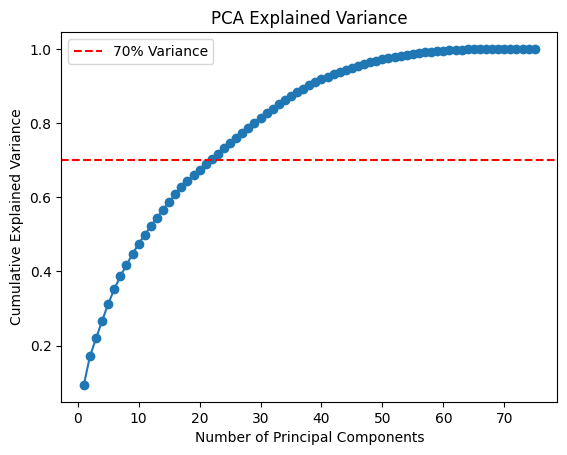

In [159]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--', label='70% Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.show()

### How much variance is explained by 40 components?

In [160]:
pca_40 = PCA(n_components=40)
pca_40.fit(X)

explained_variance_40 = np.sum(pca_40.explained_variance_ratio_)

print(f"Variance explained by 40 components: {explained_variance_40:.4f}") 

Variance explained by 40 components: 0.9179


### Reconstruct the data using the number of components obtained in the previous question and enter the Mean Squared Error value obtained

In [161]:
from sklearn.metrics import mean_squared_error

pca = PCA(n_components=num_components_70)
mile4_pca = pca.fit_transform(X)  

mile4_reconstructed = pca.inverse_transform(mile4_pca)

mse = mean_squared_error(X, mile4_reconstructed)

print(f"Mean Squared Error of reconstruction: {mse}")

Mean Squared Error of reconstruction: 0.28110949305120597


### What is the score of the best feature as obtained?

# Milestone 5

## Decision Tree

In [162]:
import pandas as pd
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')

Preprocessing Pipeline
The preprocessing steps mentioned below are to be used for all the questions that are a part of this milestone.

Separate the features as X and target as y

Impute the categorical columns with the "mode" and the numeric columns with the "mean".

Perform Ordinal encoding on all the categoric columns.

Use a standard scaler to scale all the numeric columns.

Perform a train test split with a test size 0.2 and random state 42

In [163]:
X = df.drop(columns=['target'])
y = df['target']

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

cat_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),  # Impute with mode
    ("encoder", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1))  # Ordinal Encoding
])

num_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # Impute with mean
    ("scaler", StandardScaler())  # Standard Scaling
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, num_cols),
    ("cat", cat_transformer, cat_cols)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [165]:
print(X_train.shape)
print(X_test.shape)

(80000, 75)
(20000, 75)


Model-1
Train a Decision Tree Model with random_state = 42, keeping all the other parameters as default and answer the questions that follow

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)

report = classification_report(y_test, y_pred_dt)
print("Classification report:", report)

Confusion Matrix:
 [[5316 4562]
 [5014 5108]]
Classification report:               precision    recall  f1-score   support

           0       0.51      0.54      0.53      9878
           1       0.53      0.50      0.52     10122

    accuracy                           0.52     20000
   macro avg       0.52      0.52      0.52     20000
weighted avg       0.52      0.52      0.52     20000



Model-2
Train an AdaBoost Model with random_state = 42 wherever necessary, "n_estimators=10" and "learning_rate = 10". Keep the remaining parameters with default values

In [167]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=10, learning_rate=10, random_state=42)
model_ada.fit(X_train, y_train)

y_pred_ada = model_ada.predict(X_test)

cm_ada = confusion_matrix(y_test, y_pred_ada)
print("Confusion Matrix:\n", cm_ada)

report = classification_report(y_test, y_pred_ada)

print("Classification report:", report)

Confusion Matrix:
 [[    0  9878]
 [    0 10122]]
Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9878
           1       0.51      1.00      0.67     10122

    accuracy                           0.51     20000
   macro avg       0.25      0.50      0.34     20000
weighted avg       0.26      0.51      0.34     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [168]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)

y_pred_logreg = model_logreg.predict(X_test)

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:\n", cm_logreg)

report = classification_report(y_test, y_pred_logreg)

print("Classification report:", report)

Confusion Matrix:
 [[2305 7573]
 [1762 8360]]
Classification report:               precision    recall  f1-score   support

           0       0.57      0.23      0.33      9878
           1       0.52      0.83      0.64     10122

    accuracy                           0.53     20000
   macro avg       0.55      0.53      0.49     20000
weighted avg       0.55      0.53      0.49     20000

